In [1]:
from src.time_series_prep import *
import pandas as pd
from models.generalized_model import *
from models.helper_functions import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging
from src.post_processing import *
from collections import defaultdict

# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [2]:
model_type = 'generalized'

scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [3]:
histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [4]:
prediction_horizon = 6
train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                window_size,BATCH_SIZE, prediction_horizon,
                                                                                model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)


model_all_train = GeneralizedModelWithAttention(input_shape=input_shape , output_shape=output_shape) 
model_all_train = model_all_train.to(device)
model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=150, learning_rate=0.00001, model_type = model_type)
histories_noval_PHs[prediction_horizon] = history2

Epoch 1/150: 100%|██████████| 213/213 [00:09<00:00, 22.88batch/s, mae_loss=0.694]


Epoch [1/150], Training MAE: 0.6946, Training RMSE: 0.9209
Epoch [1/150], Validation MAE: 0.5667, Validation RMSE: 0.8246


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 26.75batch/s, mae_loss=0.667]


Epoch [2/150], Training MAE: 0.6872, Training RMSE: 0.9143
Epoch [2/150], Validation MAE: 0.5629, Validation RMSE: 0.8211


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.634]


Epoch [3/150], Training MAE: 0.6840, Training RMSE: 0.9095
Epoch [3/150], Validation MAE: 0.5606, Validation RMSE: 0.8169


Epoch 4/150: 100%|██████████| 213/213 [00:08<00:00, 24.87batch/s, mae_loss=0.669]


Epoch [4/150], Training MAE: 0.6815, Training RMSE: 0.9055
Epoch [4/150], Validation MAE: 0.5583, Validation RMSE: 0.8131


Epoch 5/150: 100%|██████████| 213/213 [00:08<00:00, 25.50batch/s, mae_loss=0.666]


Epoch [5/150], Training MAE: 0.6792, Training RMSE: 0.9015
Epoch [5/150], Validation MAE: 0.5569, Validation RMSE: 0.8103


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.645]


Epoch [6/150], Training MAE: 0.6771, Training RMSE: 0.8981
Epoch [6/150], Validation MAE: 0.5553, Validation RMSE: 0.8079


Epoch 7/150: 100%|██████████| 213/213 [00:10<00:00, 20.41batch/s, mae_loss=0.601]


Epoch [7/150], Training MAE: 0.6751, Training RMSE: 0.8948
Epoch [7/150], Validation MAE: 0.5533, Validation RMSE: 0.8045


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 32.66batch/s, mae_loss=0.695]


Epoch [8/150], Training MAE: 0.6728, Training RMSE: 0.8915
Epoch [8/150], Validation MAE: 0.5513, Validation RMSE: 0.8011


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.672]


Epoch [9/150], Training MAE: 0.6696, Training RMSE: 0.8870
Epoch [9/150], Validation MAE: 0.5485, Validation RMSE: 0.7968


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.62] 


Epoch [10/150], Training MAE: 0.6651, Training RMSE: 0.8813
Epoch [10/150], Validation MAE: 0.5444, Validation RMSE: 0.7911


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 33.47batch/s, mae_loss=0.688]


Epoch [11/150], Training MAE: 0.6608, Training RMSE: 0.8760
Epoch [11/150], Validation MAE: 0.5402, Validation RMSE: 0.7853


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 32.10batch/s, mae_loss=0.618]


Epoch [12/150], Training MAE: 0.6556, Training RMSE: 0.8694
Epoch [12/150], Validation MAE: 0.5363, Validation RMSE: 0.7802


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 33.15batch/s, mae_loss=0.66] 


Epoch [13/150], Training MAE: 0.6505, Training RMSE: 0.8640
Epoch [13/150], Validation MAE: 0.5303, Validation RMSE: 0.7735


Epoch 14/150: 100%|██████████| 213/213 [00:06<00:00, 32.50batch/s, mae_loss=0.616]


Epoch [14/150], Training MAE: 0.6444, Training RMSE: 0.8571
Epoch [14/150], Validation MAE: 0.5256, Validation RMSE: 0.7666


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.649]


Epoch [15/150], Training MAE: 0.6383, Training RMSE: 0.8497
Epoch [15/150], Validation MAE: 0.5195, Validation RMSE: 0.7593


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 33.80batch/s, mae_loss=0.575]


Epoch [16/150], Training MAE: 0.6316, Training RMSE: 0.8420
Epoch [16/150], Validation MAE: 0.5133, Validation RMSE: 0.7518


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 33.68batch/s, mae_loss=0.609]


Epoch [17/150], Training MAE: 0.6263, Training RMSE: 0.8357
Epoch [17/150], Validation MAE: 0.5077, Validation RMSE: 0.7442


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 33.67batch/s, mae_loss=0.576]


Epoch [18/150], Training MAE: 0.6204, Training RMSE: 0.8284
Epoch [18/150], Validation MAE: 0.5011, Validation RMSE: 0.7363


Epoch 19/150: 100%|██████████| 213/213 [00:08<00:00, 23.94batch/s, mae_loss=0.588]


Epoch [19/150], Training MAE: 0.6155, Training RMSE: 0.8226
Epoch [19/150], Validation MAE: 0.4958, Validation RMSE: 0.7289


Epoch 20/150: 100%|██████████| 213/213 [00:09<00:00, 23.12batch/s, mae_loss=0.583]


Epoch [20/150], Training MAE: 0.6105, Training RMSE: 0.8163
Epoch [20/150], Validation MAE: 0.4906, Validation RMSE: 0.7215


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 28.21batch/s, mae_loss=0.631]


Epoch [21/150], Training MAE: 0.6052, Training RMSE: 0.8103
Epoch [21/150], Validation MAE: 0.4863, Validation RMSE: 0.7153


Epoch 22/150: 100%|██████████| 213/213 [00:08<00:00, 25.70batch/s, mae_loss=0.585]


Epoch [22/150], Training MAE: 0.6018, Training RMSE: 0.8051
Epoch [22/150], Validation MAE: 0.4826, Validation RMSE: 0.7098


Epoch 23/150: 100%|██████████| 213/213 [00:08<00:00, 24.71batch/s, mae_loss=0.615]


Epoch [23/150], Training MAE: 0.5963, Training RMSE: 0.7990
Epoch [23/150], Validation MAE: 0.4778, Validation RMSE: 0.7029


Epoch 24/150: 100%|██████████| 213/213 [00:08<00:00, 26.31batch/s, mae_loss=0.616]


Epoch [24/150], Training MAE: 0.5933, Training RMSE: 0.7944
Epoch [24/150], Validation MAE: 0.4730, Validation RMSE: 0.6969


Epoch 25/150: 100%|██████████| 213/213 [00:09<00:00, 22.37batch/s, mae_loss=0.625]


Epoch [25/150], Training MAE: 0.5890, Training RMSE: 0.7894
Epoch [25/150], Validation MAE: 0.4694, Validation RMSE: 0.6916


Epoch 26/150: 100%|██████████| 213/213 [00:08<00:00, 25.74batch/s, mae_loss=0.554]


Epoch [26/150], Training MAE: 0.5846, Training RMSE: 0.7833
Epoch [26/150], Validation MAE: 0.4651, Validation RMSE: 0.6855


Epoch 27/150: 100%|██████████| 213/213 [00:08<00:00, 23.89batch/s, mae_loss=0.577]


Epoch [27/150], Training MAE: 0.5809, Training RMSE: 0.7782
Epoch [27/150], Validation MAE: 0.4617, Validation RMSE: 0.6810


Epoch 28/150: 100%|██████████| 213/213 [00:08<00:00, 26.04batch/s, mae_loss=0.583]


Epoch [28/150], Training MAE: 0.5759, Training RMSE: 0.7721
Epoch [28/150], Validation MAE: 0.4579, Validation RMSE: 0.6749


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 32.34batch/s, mae_loss=0.586]


Epoch [29/150], Training MAE: 0.5731, Training RMSE: 0.7679
Epoch [29/150], Validation MAE: 0.4552, Validation RMSE: 0.6708


Epoch 30/150: 100%|██████████| 213/213 [00:08<00:00, 24.13batch/s, mae_loss=0.632]


Epoch [30/150], Training MAE: 0.5678, Training RMSE: 0.7619
Epoch [30/150], Validation MAE: 0.4511, Validation RMSE: 0.6656


Epoch 31/150: 100%|██████████| 213/213 [00:09<00:00, 23.16batch/s, mae_loss=0.602]


Epoch [31/150], Training MAE: 0.5645, Training RMSE: 0.7569
Epoch [31/150], Validation MAE: 0.4473, Validation RMSE: 0.6605


Epoch 32/150: 100%|██████████| 213/213 [00:08<00:00, 26.53batch/s, mae_loss=0.554]


Epoch [32/150], Training MAE: 0.5610, Training RMSE: 0.7526
Epoch [32/150], Validation MAE: 0.4447, Validation RMSE: 0.6565


Epoch 33/150: 100%|██████████| 213/213 [00:08<00:00, 25.54batch/s, mae_loss=0.565]


Epoch [33/150], Training MAE: 0.5573, Training RMSE: 0.7479
Epoch [33/150], Validation MAE: 0.4419, Validation RMSE: 0.6518


Epoch 34/150: 100%|██████████| 213/213 [00:09<00:00, 23.04batch/s, mae_loss=0.539]


Epoch [34/150], Training MAE: 0.5528, Training RMSE: 0.7415
Epoch [34/150], Validation MAE: 0.4386, Validation RMSE: 0.6466


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 23.80batch/s, mae_loss=0.53] 


Epoch [35/150], Training MAE: 0.5503, Training RMSE: 0.7388
Epoch [35/150], Validation MAE: 0.4357, Validation RMSE: 0.6425


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 26.90batch/s, mae_loss=0.488]


Epoch [36/150], Training MAE: 0.5469, Training RMSE: 0.7342
Epoch [36/150], Validation MAE: 0.4322, Validation RMSE: 0.6382


Epoch 37/150: 100%|██████████| 213/213 [00:09<00:00, 22.78batch/s, mae_loss=0.566]


Epoch [37/150], Training MAE: 0.5422, Training RMSE: 0.7285
Epoch [37/150], Validation MAE: 0.4301, Validation RMSE: 0.6341


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.516]


Epoch [38/150], Training MAE: 0.5398, Training RMSE: 0.7249
Epoch [38/150], Validation MAE: 0.4266, Validation RMSE: 0.6295


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.51] 


Epoch [39/150], Training MAE: 0.5370, Training RMSE: 0.7214
Epoch [39/150], Validation MAE: 0.4240, Validation RMSE: 0.6253


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.558]


Epoch [40/150], Training MAE: 0.5339, Training RMSE: 0.7176
Epoch [40/150], Validation MAE: 0.4215, Validation RMSE: 0.6215


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 26.62batch/s, mae_loss=0.558]


Epoch [41/150], Training MAE: 0.5303, Training RMSE: 0.7138
Epoch [41/150], Validation MAE: 0.4183, Validation RMSE: 0.6171


Epoch 42/150: 100%|██████████| 213/213 [00:08<00:00, 25.29batch/s, mae_loss=0.54] 


Epoch [42/150], Training MAE: 0.5276, Training RMSE: 0.7100
Epoch [42/150], Validation MAE: 0.4167, Validation RMSE: 0.6140


Epoch 43/150: 100%|██████████| 213/213 [00:08<00:00, 24.74batch/s, mae_loss=0.563]


Epoch [43/150], Training MAE: 0.5246, Training RMSE: 0.7059
Epoch [43/150], Validation MAE: 0.4130, Validation RMSE: 0.6108


Epoch 44/150: 100%|██████████| 213/213 [00:08<00:00, 25.49batch/s, mae_loss=0.507]


Epoch [44/150], Training MAE: 0.5224, Training RMSE: 0.7038
Epoch [44/150], Validation MAE: 0.4109, Validation RMSE: 0.6072


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 30.11batch/s, mae_loss=0.53] 


Epoch [45/150], Training MAE: 0.5195, Training RMSE: 0.6997
Epoch [45/150], Validation MAE: 0.4088, Validation RMSE: 0.6042


Epoch 46/150: 100%|██████████| 213/213 [00:08<00:00, 25.79batch/s, mae_loss=0.569]


Epoch [46/150], Training MAE: 0.5167, Training RMSE: 0.6969
Epoch [46/150], Validation MAE: 0.4067, Validation RMSE: 0.6016


Epoch 47/150: 100%|██████████| 213/213 [00:08<00:00, 26.23batch/s, mae_loss=0.505]


Epoch [47/150], Training MAE: 0.5145, Training RMSE: 0.6937
Epoch [47/150], Validation MAE: 0.4040, Validation RMSE: 0.5979


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 30.10batch/s, mae_loss=0.522]


Epoch [48/150], Training MAE: 0.5128, Training RMSE: 0.6910
Epoch [48/150], Validation MAE: 0.4019, Validation RMSE: 0.5957


Epoch 49/150: 100%|██████████| 213/213 [00:08<00:00, 24.64batch/s, mae_loss=0.503]


Epoch [49/150], Training MAE: 0.5105, Training RMSE: 0.6883
Epoch [49/150], Validation MAE: 0.4000, Validation RMSE: 0.5939


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 26.68batch/s, mae_loss=0.483]


Epoch [50/150], Training MAE: 0.5088, Training RMSE: 0.6863
Epoch [50/150], Validation MAE: 0.3985, Validation RMSE: 0.5912


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 26.75batch/s, mae_loss=0.506]


Epoch [51/150], Training MAE: 0.5065, Training RMSE: 0.6840
Epoch [51/150], Validation MAE: 0.3965, Validation RMSE: 0.5887


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 32.71batch/s, mae_loss=0.502]


Epoch [52/150], Training MAE: 0.5044, Training RMSE: 0.6809
Epoch [52/150], Validation MAE: 0.3946, Validation RMSE: 0.5857


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.54batch/s, mae_loss=0.52] 


Epoch [53/150], Training MAE: 0.5018, Training RMSE: 0.6779
Epoch [53/150], Validation MAE: 0.3934, Validation RMSE: 0.5842


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.497]


Epoch [54/150], Training MAE: 0.5016, Training RMSE: 0.6774
Epoch [54/150], Validation MAE: 0.3920, Validation RMSE: 0.5816


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.515]


Epoch [55/150], Training MAE: 0.4983, Training RMSE: 0.6736
Epoch [55/150], Validation MAE: 0.3898, Validation RMSE: 0.5794


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.507]


Epoch [56/150], Training MAE: 0.4965, Training RMSE: 0.6713
Epoch [56/150], Validation MAE: 0.3881, Validation RMSE: 0.5774


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 24.98batch/s, mae_loss=0.498]


Epoch [57/150], Training MAE: 0.4941, Training RMSE: 0.6691
Epoch [57/150], Validation MAE: 0.3865, Validation RMSE: 0.5749


Epoch 58/150: 100%|██████████| 213/213 [00:08<00:00, 26.43batch/s, mae_loss=0.493]


Epoch [58/150], Training MAE: 0.4922, Training RMSE: 0.6666
Epoch [58/150], Validation MAE: 0.3843, Validation RMSE: 0.5718


Epoch 59/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.397]


Epoch [59/150], Training MAE: 0.4911, Training RMSE: 0.6652
Epoch [59/150], Validation MAE: 0.3829, Validation RMSE: 0.5701


Epoch 60/150: 100%|██████████| 213/213 [00:08<00:00, 24.93batch/s, mae_loss=0.465]


Epoch [60/150], Training MAE: 0.4891, Training RMSE: 0.6620
Epoch [60/150], Validation MAE: 0.3815, Validation RMSE: 0.5677


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.487]


Epoch [61/150], Training MAE: 0.4878, Training RMSE: 0.6606
Epoch [61/150], Validation MAE: 0.3794, Validation RMSE: 0.5658


Epoch 62/150: 100%|██████████| 213/213 [00:08<00:00, 26.37batch/s, mae_loss=0.471]


Epoch [62/150], Training MAE: 0.4855, Training RMSE: 0.6581
Epoch [62/150], Validation MAE: 0.3780, Validation RMSE: 0.5629


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 30.36batch/s, mae_loss=0.462]


Epoch [63/150], Training MAE: 0.4838, Training RMSE: 0.6555
Epoch [63/150], Validation MAE: 0.3759, Validation RMSE: 0.5606


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 32.92batch/s, mae_loss=0.512]


Epoch [64/150], Training MAE: 0.4817, Training RMSE: 0.6535
Epoch [64/150], Validation MAE: 0.3743, Validation RMSE: 0.5585


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 33.46batch/s, mae_loss=0.494]


Epoch [65/150], Training MAE: 0.4801, Training RMSE: 0.6513
Epoch [65/150], Validation MAE: 0.3727, Validation RMSE: 0.5557


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 33.57batch/s, mae_loss=0.496]


Epoch [66/150], Training MAE: 0.4779, Training RMSE: 0.6483
Epoch [66/150], Validation MAE: 0.3716, Validation RMSE: 0.5535


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.44] 


Epoch [67/150], Training MAE: 0.4760, Training RMSE: 0.6462
Epoch [67/150], Validation MAE: 0.3696, Validation RMSE: 0.5507


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 33.99batch/s, mae_loss=0.484]


Epoch [68/150], Training MAE: 0.4746, Training RMSE: 0.6436
Epoch [68/150], Validation MAE: 0.3682, Validation RMSE: 0.5485


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 29.91batch/s, mae_loss=0.442]


Epoch [69/150], Training MAE: 0.4716, Training RMSE: 0.6404
Epoch [69/150], Validation MAE: 0.3654, Validation RMSE: 0.5452


Epoch 70/150: 100%|██████████| 213/213 [00:09<00:00, 23.27batch/s, mae_loss=0.514]


Epoch [70/150], Training MAE: 0.4701, Training RMSE: 0.6379
Epoch [70/150], Validation MAE: 0.3641, Validation RMSE: 0.5423


Epoch 71/150: 100%|██████████| 213/213 [00:08<00:00, 26.59batch/s, mae_loss=0.453]


Epoch [71/150], Training MAE: 0.4688, Training RMSE: 0.6366
Epoch [71/150], Validation MAE: 0.3621, Validation RMSE: 0.5395


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 26.93batch/s, mae_loss=0.434]


Epoch [72/150], Training MAE: 0.4666, Training RMSE: 0.6332
Epoch [72/150], Validation MAE: 0.3609, Validation RMSE: 0.5370


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.16batch/s, mae_loss=0.498]


Epoch [73/150], Training MAE: 0.4651, Training RMSE: 0.6311
Epoch [73/150], Validation MAE: 0.3587, Validation RMSE: 0.5343


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.431]


Epoch [74/150], Training MAE: 0.4627, Training RMSE: 0.6284
Epoch [74/150], Validation MAE: 0.3572, Validation RMSE: 0.5321


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 27.18batch/s, mae_loss=0.46] 


Epoch [75/150], Training MAE: 0.4621, Training RMSE: 0.6269
Epoch [75/150], Validation MAE: 0.3552, Validation RMSE: 0.5289


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 26.69batch/s, mae_loss=0.452]


Epoch [76/150], Training MAE: 0.4606, Training RMSE: 0.6250
Epoch [76/150], Validation MAE: 0.3535, Validation RMSE: 0.5263


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 30.49batch/s, mae_loss=0.464]


Epoch [77/150], Training MAE: 0.4591, Training RMSE: 0.6231
Epoch [77/150], Validation MAE: 0.3517, Validation RMSE: 0.5236


Epoch 78/150: 100%|██████████| 213/213 [00:09<00:00, 23.58batch/s, mae_loss=0.472]


Epoch [78/150], Training MAE: 0.4559, Training RMSE: 0.6188
Epoch [78/150], Validation MAE: 0.3497, Validation RMSE: 0.5201


Epoch 79/150: 100%|██████████| 213/213 [00:08<00:00, 24.84batch/s, mae_loss=0.475]


Epoch [79/150], Training MAE: 0.4543, Training RMSE: 0.6167
Epoch [79/150], Validation MAE: 0.3479, Validation RMSE: 0.5173


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.429]


Epoch [80/150], Training MAE: 0.4539, Training RMSE: 0.6157
Epoch [80/150], Validation MAE: 0.3466, Validation RMSE: 0.5152


Epoch 81/150: 100%|██████████| 213/213 [00:08<00:00, 26.37batch/s, mae_loss=0.493]


Epoch [81/150], Training MAE: 0.4521, Training RMSE: 0.6130
Epoch [81/150], Validation MAE: 0.3445, Validation RMSE: 0.5124


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 26.84batch/s, mae_loss=0.461]


Epoch [82/150], Training MAE: 0.4504, Training RMSE: 0.6111
Epoch [82/150], Validation MAE: 0.3433, Validation RMSE: 0.5099


Epoch 83/150: 100%|██████████| 213/213 [00:08<00:00, 25.93batch/s, mae_loss=0.435]


Epoch [83/150], Training MAE: 0.4490, Training RMSE: 0.6092
Epoch [83/150], Validation MAE: 0.3420, Validation RMSE: 0.5080


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.444]


Epoch [84/150], Training MAE: 0.4465, Training RMSE: 0.6059
Epoch [84/150], Validation MAE: 0.3402, Validation RMSE: 0.5054


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 28.00batch/s, mae_loss=0.426]


Epoch [85/150], Training MAE: 0.4446, Training RMSE: 0.6034
Epoch [85/150], Validation MAE: 0.3391, Validation RMSE: 0.5039


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 27.44batch/s, mae_loss=0.44] 


Epoch [86/150], Training MAE: 0.4434, Training RMSE: 0.6009
Epoch [86/150], Validation MAE: 0.3363, Validation RMSE: 0.5004


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 27.38batch/s, mae_loss=0.462]


Epoch [87/150], Training MAE: 0.4430, Training RMSE: 0.6010
Epoch [87/150], Validation MAE: 0.3356, Validation RMSE: 0.4991


Epoch 88/150: 100%|██████████| 213/213 [00:08<00:00, 25.02batch/s, mae_loss=0.46] 


Epoch [88/150], Training MAE: 0.4418, Training RMSE: 0.5989
Epoch [88/150], Validation MAE: 0.3341, Validation RMSE: 0.4965


Epoch 89/150: 100%|██████████| 213/213 [00:08<00:00, 23.77batch/s, mae_loss=0.422]


Epoch [89/150], Training MAE: 0.4396, Training RMSE: 0.5962
Epoch [89/150], Validation MAE: 0.3324, Validation RMSE: 0.4946


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 29.15batch/s, mae_loss=0.407]


Epoch [90/150], Training MAE: 0.4381, Training RMSE: 0.5937
Epoch [90/150], Validation MAE: 0.3302, Validation RMSE: 0.4921


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.422]


Epoch [91/150], Training MAE: 0.4363, Training RMSE: 0.5913
Epoch [91/150], Validation MAE: 0.3297, Validation RMSE: 0.4903


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 32.70batch/s, mae_loss=0.436]


Epoch [92/150], Training MAE: 0.4356, Training RMSE: 0.5903
Epoch [92/150], Validation MAE: 0.3276, Validation RMSE: 0.4883


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.449]


Epoch [93/150], Training MAE: 0.4345, Training RMSE: 0.5892
Epoch [93/150], Validation MAE: 0.3270, Validation RMSE: 0.4867


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.429]


Epoch [94/150], Training MAE: 0.4340, Training RMSE: 0.5875
Epoch [94/150], Validation MAE: 0.3254, Validation RMSE: 0.4846


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 33.34batch/s, mae_loss=0.436]


Epoch [95/150], Training MAE: 0.4332, Training RMSE: 0.5871
Epoch [95/150], Validation MAE: 0.3242, Validation RMSE: 0.4834


Epoch 96/150: 100%|██████████| 213/213 [00:08<00:00, 26.55batch/s, mae_loss=0.446]


Epoch [96/150], Training MAE: 0.4319, Training RMSE: 0.5848
Epoch [96/150], Validation MAE: 0.3228, Validation RMSE: 0.4804


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 33.05batch/s, mae_loss=0.434]


Epoch [97/150], Training MAE: 0.4284, Training RMSE: 0.5813
Epoch [97/150], Validation MAE: 0.3215, Validation RMSE: 0.4789


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 32.81batch/s, mae_loss=0.424]


Epoch [98/150], Training MAE: 0.4287, Training RMSE: 0.5810
Epoch [98/150], Validation MAE: 0.3202, Validation RMSE: 0.4770


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 32.05batch/s, mae_loss=0.442]


Epoch [99/150], Training MAE: 0.4270, Training RMSE: 0.5783
Epoch [99/150], Validation MAE: 0.3192, Validation RMSE: 0.4752


Epoch 100/150: 100%|██████████| 213/213 [00:09<00:00, 21.86batch/s, mae_loss=0.396]


Epoch [100/150], Training MAE: 0.4261, Training RMSE: 0.5769
Epoch [100/150], Validation MAE: 0.3174, Validation RMSE: 0.4732


Epoch 101/150: 100%|██████████| 213/213 [00:08<00:00, 24.92batch/s, mae_loss=0.403]


Epoch [101/150], Training MAE: 0.4250, Training RMSE: 0.5753
Epoch [101/150], Validation MAE: 0.3156, Validation RMSE: 0.4709


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.4]  


Epoch [102/150], Training MAE: 0.4233, Training RMSE: 0.5729
Epoch [102/150], Validation MAE: 0.3154, Validation RMSE: 0.4703


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 27.79batch/s, mae_loss=0.427]


Epoch [103/150], Training MAE: 0.4227, Training RMSE: 0.5721
Epoch [103/150], Validation MAE: 0.3137, Validation RMSE: 0.4673


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 28.13batch/s, mae_loss=0.405]


Epoch [104/150], Training MAE: 0.4214, Training RMSE: 0.5706
Epoch [104/150], Validation MAE: 0.3126, Validation RMSE: 0.4654


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 27.02batch/s, mae_loss=0.445]


Epoch [105/150], Training MAE: 0.4201, Training RMSE: 0.5690
Epoch [105/150], Validation MAE: 0.3112, Validation RMSE: 0.4639


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 28.09batch/s, mae_loss=0.395]


Epoch [106/150], Training MAE: 0.4196, Training RMSE: 0.5681
Epoch [106/150], Validation MAE: 0.3099, Validation RMSE: 0.4618


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 27.10batch/s, mae_loss=0.437]


Epoch [107/150], Training MAE: 0.4191, Training RMSE: 0.5668
Epoch [107/150], Validation MAE: 0.3088, Validation RMSE: 0.4602


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 27.91batch/s, mae_loss=0.376]


Epoch [108/150], Training MAE: 0.4168, Training RMSE: 0.5638
Epoch [108/150], Validation MAE: 0.3080, Validation RMSE: 0.4585


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 32.49batch/s, mae_loss=0.412]


Epoch [109/150], Training MAE: 0.4145, Training RMSE: 0.5612
Epoch [109/150], Validation MAE: 0.3062, Validation RMSE: 0.4562


Epoch 110/150: 100%|██████████| 213/213 [00:08<00:00, 24.97batch/s, mae_loss=0.408]


Epoch [110/150], Training MAE: 0.4153, Training RMSE: 0.5619
Epoch [110/150], Validation MAE: 0.3043, Validation RMSE: 0.4536


Epoch 111/150: 100%|██████████| 213/213 [00:08<00:00, 24.36batch/s, mae_loss=0.464]


Epoch [111/150], Training MAE: 0.4136, Training RMSE: 0.5589
Epoch [111/150], Validation MAE: 0.3031, Validation RMSE: 0.4512


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 27.09batch/s, mae_loss=0.408]


Epoch [112/150], Training MAE: 0.4130, Training RMSE: 0.5584
Epoch [112/150], Validation MAE: 0.3027, Validation RMSE: 0.4504


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.416]


Epoch [113/150], Training MAE: 0.4115, Training RMSE: 0.5565
Epoch [113/150], Validation MAE: 0.3013, Validation RMSE: 0.4484


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 32.40batch/s, mae_loss=0.442]


Epoch [114/150], Training MAE: 0.4101, Training RMSE: 0.5545
Epoch [114/150], Validation MAE: 0.2996, Validation RMSE: 0.4463


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 30.57batch/s, mae_loss=0.415]


Epoch [115/150], Training MAE: 0.4090, Training RMSE: 0.5527
Epoch [115/150], Validation MAE: 0.2987, Validation RMSE: 0.4443


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 33.25batch/s, mae_loss=0.388]


Epoch [116/150], Training MAE: 0.4072, Training RMSE: 0.5510
Epoch [116/150], Validation MAE: 0.2974, Validation RMSE: 0.4426


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 31.71batch/s, mae_loss=0.39] 


Epoch [117/150], Training MAE: 0.4077, Training RMSE: 0.5517
Epoch [117/150], Validation MAE: 0.2962, Validation RMSE: 0.4407


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 32.75batch/s, mae_loss=0.404]


Epoch [118/150], Training MAE: 0.4058, Training RMSE: 0.5489
Epoch [118/150], Validation MAE: 0.2955, Validation RMSE: 0.4397


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 32.31batch/s, mae_loss=0.399]


Epoch [119/150], Training MAE: 0.4048, Training RMSE: 0.5476
Epoch [119/150], Validation MAE: 0.2943, Validation RMSE: 0.4381


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 31.88batch/s, mae_loss=0.431]


Epoch [120/150], Training MAE: 0.4050, Training RMSE: 0.5467
Epoch [120/150], Validation MAE: 0.2933, Validation RMSE: 0.4365


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.395]


Epoch [121/150], Training MAE: 0.4021, Training RMSE: 0.5440
Epoch [121/150], Validation MAE: 0.2927, Validation RMSE: 0.4353


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 33.26batch/s, mae_loss=0.387]


Epoch [122/150], Training MAE: 0.4019, Training RMSE: 0.5429
Epoch [122/150], Validation MAE: 0.2907, Validation RMSE: 0.4328


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 33.50batch/s, mae_loss=0.402]


Epoch [123/150], Training MAE: 0.4009, Training RMSE: 0.5422
Epoch [123/150], Validation MAE: 0.2905, Validation RMSE: 0.4328


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 31.71batch/s, mae_loss=0.404]


Epoch [124/150], Training MAE: 0.3993, Training RMSE: 0.5406
Epoch [124/150], Validation MAE: 0.2888, Validation RMSE: 0.4301


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 31.69batch/s, mae_loss=0.396]


Epoch [125/150], Training MAE: 0.3990, Training RMSE: 0.5398
Epoch [125/150], Validation MAE: 0.2887, Validation RMSE: 0.4293


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.10batch/s, mae_loss=0.392]


Epoch [126/150], Training MAE: 0.3986, Training RMSE: 0.5393
Epoch [126/150], Validation MAE: 0.2877, Validation RMSE: 0.4285


Epoch 127/150: 100%|██████████| 213/213 [00:08<00:00, 25.89batch/s, mae_loss=0.403]


Epoch [127/150], Training MAE: 0.3987, Training RMSE: 0.5395
Epoch [127/150], Validation MAE: 0.2868, Validation RMSE: 0.4267


Epoch 128/150: 100%|██████████| 213/213 [00:08<00:00, 26.24batch/s, mae_loss=0.416]


Epoch [128/150], Training MAE: 0.3980, Training RMSE: 0.5381
Epoch [128/150], Validation MAE: 0.2863, Validation RMSE: 0.4258


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 28.98batch/s, mae_loss=0.4]  


Epoch [129/150], Training MAE: 0.3962, Training RMSE: 0.5357
Epoch [129/150], Validation MAE: 0.2860, Validation RMSE: 0.4253


Epoch 130/150: 100%|██████████| 213/213 [00:09<00:00, 22.45batch/s, mae_loss=0.423]


Epoch [130/150], Training MAE: 0.3958, Training RMSE: 0.5352
Epoch [130/150], Validation MAE: 0.2856, Validation RMSE: 0.4247


Epoch 131/150: 100%|██████████| 213/213 [00:08<00:00, 24.13batch/s, mae_loss=0.392]


Epoch [131/150], Training MAE: 0.3955, Training RMSE: 0.5359
Epoch [131/150], Validation MAE: 0.2847, Validation RMSE: 0.4234


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 27.63batch/s, mae_loss=0.418]


Epoch [132/150], Training MAE: 0.3941, Training RMSE: 0.5337
Epoch [132/150], Validation MAE: 0.2842, Validation RMSE: 0.4227


Epoch 133/150: 100%|██████████| 213/213 [00:08<00:00, 25.91batch/s, mae_loss=0.392]


Epoch [133/150], Training MAE: 0.3943, Training RMSE: 0.5338
Epoch [133/150], Validation MAE: 0.2839, Validation RMSE: 0.4223


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.422]


Epoch [134/150], Training MAE: 0.3943, Training RMSE: 0.5330
Epoch [134/150], Validation MAE: 0.2833, Validation RMSE: 0.4218


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 27.85batch/s, mae_loss=0.376]


Epoch [135/150], Training MAE: 0.3935, Training RMSE: 0.5327
Epoch [135/150], Validation MAE: 0.2824, Validation RMSE: 0.4205


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 27.72batch/s, mae_loss=0.381]


Epoch [136/150], Training MAE: 0.3923, Training RMSE: 0.5310
Epoch [136/150], Validation MAE: 0.2823, Validation RMSE: 0.4204


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 27.28batch/s, mae_loss=0.392]


Epoch [137/150], Training MAE: 0.3920, Training RMSE: 0.5310
Epoch [137/150], Validation MAE: 0.2812, Validation RMSE: 0.4186


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.401]


Epoch [138/150], Training MAE: 0.3903, Training RMSE: 0.5283
Epoch [138/150], Validation MAE: 0.2814, Validation RMSE: 0.4189


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.349]


Epoch [139/150], Training MAE: 0.3901, Training RMSE: 0.5286
Epoch [139/150], Validation MAE: 0.2812, Validation RMSE: 0.4189


Epoch 140/150: 100%|██████████| 213/213 [00:08<00:00, 26.55batch/s, mae_loss=0.376]


Epoch [140/150], Training MAE: 0.3901, Training RMSE: 0.5280
Epoch [140/150], Validation MAE: 0.2797, Validation RMSE: 0.4175


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 26.69batch/s, mae_loss=0.425]


Epoch [141/150], Training MAE: 0.3884, Training RMSE: 0.5263
Epoch [141/150], Validation MAE: 0.2793, Validation RMSE: 0.4166


Epoch 142/150: 100%|██████████| 213/213 [00:08<00:00, 25.01batch/s, mae_loss=0.399]


Epoch [142/150], Training MAE: 0.3886, Training RMSE: 0.5273
Epoch [142/150], Validation MAE: 0.2790, Validation RMSE: 0.4162


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 33.54batch/s, mae_loss=0.406]


Epoch [143/150], Training MAE: 0.3885, Training RMSE: 0.5266
Epoch [143/150], Validation MAE: 0.2790, Validation RMSE: 0.4159


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 31.73batch/s, mae_loss=0.382]


Epoch [144/150], Training MAE: 0.3878, Training RMSE: 0.5246
Epoch [144/150], Validation MAE: 0.2782, Validation RMSE: 0.4146


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 32.17batch/s, mae_loss=0.398]


Epoch [145/150], Training MAE: 0.3871, Training RMSE: 0.5248
Epoch [145/150], Validation MAE: 0.2783, Validation RMSE: 0.4152


Epoch 146/150: 100%|██████████| 213/213 [00:08<00:00, 25.32batch/s, mae_loss=0.399]


Epoch [146/150], Training MAE: 0.3857, Training RMSE: 0.5236
Epoch [146/150], Validation MAE: 0.2774, Validation RMSE: 0.4136


Epoch 147/150: 100%|██████████| 213/213 [00:08<00:00, 25.82batch/s, mae_loss=0.431]


Epoch [147/150], Training MAE: 0.3850, Training RMSE: 0.5221
Epoch [147/150], Validation MAE: 0.2779, Validation RMSE: 0.4139


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 33.01batch/s, mae_loss=0.37] 


Epoch [148/150], Training MAE: 0.3847, Training RMSE: 0.5217
Epoch [148/150], Validation MAE: 0.2765, Validation RMSE: 0.4123


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.406]


Epoch [149/150], Training MAE: 0.3847, Training RMSE: 0.5214
Epoch [149/150], Validation MAE: 0.2763, Validation RMSE: 0.4121


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 30.15batch/s, mae_loss=0.421]


Epoch [150/150], Training MAE: 0.3844, Training RMSE: 0.5218
Epoch [150/150], Validation MAE: 0.2761, Validation RMSE: 0.4118


In [5]:
pd.DataFrame(histories_noval_PHs[6]).to_csv("saved_models\\loss_ph6_generalized.csv")

In [7]:
for prediction_horizon in prediction_horizons:
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5): # indicating 5 runs 

        logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
        print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
        

        model_all_train = GeneralizedModelWithAttention(input_shape=input_shape , output_shape=output_shape) 
        model_all_train = model_all_train.to(device)
        model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = None, epochs=150, learning_rate=0.00001, model_type = model_type)
        histories_noval_PHs[prediction_horizon] = history2


        logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{str(i)}.pth')
        print(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
        logger.info(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")

Start Prediction Horizon 24 of generalized model


Epoch 1/150: 100%|██████████| 213/213 [00:07<00:00, 28.59batch/s, mae_loss=0.587]


Epoch [1/150], Training MAE: 0.6944, Training RMSE: 0.9241


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 29.66batch/s, mae_loss=0.631]


Epoch [2/150], Training MAE: 0.6911, Training RMSE: 0.9216


Epoch 3/150: 100%|██████████| 213/213 [00:09<00:00, 22.16batch/s, mae_loss=0.633]


Epoch [3/150], Training MAE: 0.6896, Training RMSE: 0.9204


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 27.53batch/s, mae_loss=0.7]  


Epoch [4/150], Training MAE: 0.6887, Training RMSE: 0.9199


Epoch 5/150: 100%|██████████| 213/213 [00:10<00:00, 19.90batch/s, mae_loss=0.682]


Epoch [5/150], Training MAE: 0.6878, Training RMSE: 0.9192


Epoch 6/150: 100%|██████████| 213/213 [00:09<00:00, 22.91batch/s, mae_loss=0.784]


Epoch [6/150], Training MAE: 0.6874, Training RMSE: 0.9188


Epoch 7/150: 100%|██████████| 213/213 [00:09<00:00, 22.99batch/s, mae_loss=0.691]


Epoch [7/150], Training MAE: 0.6866, Training RMSE: 0.9179


Epoch 8/150: 100%|██████████| 213/213 [00:09<00:00, 23.25batch/s, mae_loss=0.729]


Epoch [8/150], Training MAE: 0.6863, Training RMSE: 0.9176


Epoch 9/150: 100%|██████████| 213/213 [00:08<00:00, 25.07batch/s, mae_loss=0.695]


Epoch [9/150], Training MAE: 0.6857, Training RMSE: 0.9170


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 27.72batch/s, mae_loss=0.71] 


Epoch [10/150], Training MAE: 0.6851, Training RMSE: 0.9162


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.691]


Epoch [11/150], Training MAE: 0.6848, Training RMSE: 0.9159


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.654]


Epoch [12/150], Training MAE: 0.6840, Training RMSE: 0.9151


Epoch 13/150: 100%|██████████| 213/213 [00:07<00:00, 28.56batch/s, mae_loss=0.668]


Epoch [13/150], Training MAE: 0.6838, Training RMSE: 0.9148


Epoch 14/150: 100%|██████████| 213/213 [00:09<00:00, 21.64batch/s, mae_loss=0.695]


Epoch [14/150], Training MAE: 0.6834, Training RMSE: 0.9141


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 27.97batch/s, mae_loss=0.719]


Epoch [15/150], Training MAE: 0.6828, Training RMSE: 0.9136


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.713]


Epoch [16/150], Training MAE: 0.6820, Training RMSE: 0.9125


Epoch 17/150: 100%|██████████| 213/213 [00:09<00:00, 22.39batch/s, mae_loss=0.657]


Epoch [17/150], Training MAE: 0.6815, Training RMSE: 0.9115


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 27.10batch/s, mae_loss=0.712]


Epoch [18/150], Training MAE: 0.6811, Training RMSE: 0.9110


Epoch 19/150: 100%|██████████| 213/213 [00:09<00:00, 21.51batch/s, mae_loss=0.699]


Epoch [19/150], Training MAE: 0.6802, Training RMSE: 0.9100


Epoch 20/150: 100%|██████████| 213/213 [00:08<00:00, 25.41batch/s, mae_loss=0.655]


Epoch [20/150], Training MAE: 0.6792, Training RMSE: 0.9084


Epoch 21/150: 100%|██████████| 213/213 [00:07<00:00, 27.66batch/s, mae_loss=0.676]


Epoch [21/150], Training MAE: 0.6783, Training RMSE: 0.9075


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 27.88batch/s, mae_loss=0.672]


Epoch [22/150], Training MAE: 0.6777, Training RMSE: 0.9064


Epoch 23/150: 100%|██████████| 213/213 [00:08<00:00, 24.25batch/s, mae_loss=0.687]


Epoch [23/150], Training MAE: 0.6765, Training RMSE: 0.9050


Epoch 24/150: 100%|██████████| 213/213 [00:12<00:00, 17.54batch/s, mae_loss=0.708]


Epoch [24/150], Training MAE: 0.6762, Training RMSE: 0.9041


Epoch 25/150: 100%|██████████| 213/213 [00:08<00:00, 25.38batch/s, mae_loss=0.641]


Epoch [25/150], Training MAE: 0.6750, Training RMSE: 0.9031


Epoch 26/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.664]


Epoch [26/150], Training MAE: 0.6742, Training RMSE: 0.9020


Epoch 27/150: 100%|██████████| 213/213 [00:08<00:00, 25.22batch/s, mae_loss=0.66] 


Epoch [27/150], Training MAE: 0.6735, Training RMSE: 0.9011


Epoch 28/150: 100%|██████████| 213/213 [00:08<00:00, 24.66batch/s, mae_loss=0.611]


Epoch [28/150], Training MAE: 0.6723, Training RMSE: 0.8998


Epoch 29/150: 100%|██████████| 213/213 [00:11<00:00, 17.79batch/s, mae_loss=0.681]


Epoch [29/150], Training MAE: 0.6716, Training RMSE: 0.8987


Epoch 30/150: 100%|██████████| 213/213 [00:08<00:00, 25.81batch/s, mae_loss=0.665]


Epoch [30/150], Training MAE: 0.6707, Training RMSE: 0.8978


Epoch 31/150: 100%|██████████| 213/213 [00:08<00:00, 24.50batch/s, mae_loss=0.671]


Epoch [31/150], Training MAE: 0.6701, Training RMSE: 0.8970


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 26.76batch/s, mae_loss=0.609]


Epoch [32/150], Training MAE: 0.6689, Training RMSE: 0.8958


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 27.43batch/s, mae_loss=0.734]


Epoch [33/150], Training MAE: 0.6682, Training RMSE: 0.8948


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 26.80batch/s, mae_loss=0.688]


Epoch [34/150], Training MAE: 0.6671, Training RMSE: 0.8935


Epoch 35/150: 100%|██████████| 213/213 [00:08<00:00, 26.47batch/s, mae_loss=0.678]


Epoch [35/150], Training MAE: 0.6666, Training RMSE: 0.8928


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 27.93batch/s, mae_loss=0.67] 


Epoch [36/150], Training MAE: 0.6653, Training RMSE: 0.8913


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.662]


Epoch [37/150], Training MAE: 0.6650, Training RMSE: 0.8908


Epoch 38/150: 100%|██████████| 213/213 [00:08<00:00, 26.08batch/s, mae_loss=0.655]


Epoch [38/150], Training MAE: 0.6640, Training RMSE: 0.8899


Epoch 39/150: 100%|██████████| 213/213 [00:07<00:00, 28.96batch/s, mae_loss=0.745]


Epoch [39/150], Training MAE: 0.6635, Training RMSE: 0.8891


Epoch 40/150: 100%|██████████| 213/213 [00:08<00:00, 26.54batch/s, mae_loss=0.638]


Epoch [40/150], Training MAE: 0.6623, Training RMSE: 0.8881


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 25.74batch/s, mae_loss=0.63] 


Epoch [41/150], Training MAE: 0.6607, Training RMSE: 0.8864


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 27.63batch/s, mae_loss=0.672]


Epoch [42/150], Training MAE: 0.6604, Training RMSE: 0.8857


Epoch 43/150: 100%|██████████| 213/213 [00:08<00:00, 26.13batch/s, mae_loss=0.674]


Epoch [43/150], Training MAE: 0.6598, Training RMSE: 0.8849


Epoch 44/150: 100%|██████████| 213/213 [00:07<00:00, 28.54batch/s, mae_loss=0.607]


Epoch [44/150], Training MAE: 0.6589, Training RMSE: 0.8837


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 27.51batch/s, mae_loss=0.644]


Epoch [45/150], Training MAE: 0.6580, Training RMSE: 0.8830


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 28.22batch/s, mae_loss=0.643]


Epoch [46/150], Training MAE: 0.6572, Training RMSE: 0.8821


Epoch 47/150: 100%|██████████| 213/213 [00:08<00:00, 25.80batch/s, mae_loss=0.691]


Epoch [47/150], Training MAE: 0.6562, Training RMSE: 0.8812


Epoch 48/150: 100%|██████████| 213/213 [00:08<00:00, 25.93batch/s, mae_loss=0.598]


Epoch [48/150], Training MAE: 0.6553, Training RMSE: 0.8800


Epoch 49/150: 100%|██████████| 213/213 [00:08<00:00, 26.54batch/s, mae_loss=0.664]


Epoch [49/150], Training MAE: 0.6545, Training RMSE: 0.8789


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 26.85batch/s, mae_loss=0.657]


Epoch [50/150], Training MAE: 0.6539, Training RMSE: 0.8782


Epoch 51/150: 100%|██████████| 213/213 [00:08<00:00, 24.74batch/s, mae_loss=0.656]


Epoch [51/150], Training MAE: 0.6537, Training RMSE: 0.8777


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 28.47batch/s, mae_loss=0.725]


Epoch [52/150], Training MAE: 0.6526, Training RMSE: 0.8768


Epoch 53/150: 100%|██████████| 213/213 [00:08<00:00, 26.15batch/s, mae_loss=0.626]


Epoch [53/150], Training MAE: 0.6516, Training RMSE: 0.8756


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 27.22batch/s, mae_loss=0.686]


Epoch [54/150], Training MAE: 0.6512, Training RMSE: 0.8754


Epoch 55/150: 100%|██████████| 213/213 [00:08<00:00, 26.56batch/s, mae_loss=0.667]


Epoch [55/150], Training MAE: 0.6504, Training RMSE: 0.8744


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 28.03batch/s, mae_loss=0.627]


Epoch [56/150], Training MAE: 0.6490, Training RMSE: 0.8727


Epoch 57/150: 100%|██████████| 213/213 [00:08<00:00, 26.05batch/s, mae_loss=0.686]


Epoch [57/150], Training MAE: 0.6490, Training RMSE: 0.8727


Epoch 58/150: 100%|██████████| 213/213 [00:08<00:00, 26.33batch/s, mae_loss=0.628]


Epoch [58/150], Training MAE: 0.6485, Training RMSE: 0.8723


Epoch 59/150: 100%|██████████| 213/213 [00:08<00:00, 25.72batch/s, mae_loss=0.649]


Epoch [59/150], Training MAE: 0.6478, Training RMSE: 0.8713


Epoch 60/150: 100%|██████████| 213/213 [00:08<00:00, 26.56batch/s, mae_loss=0.65] 


Epoch [60/150], Training MAE: 0.6476, Training RMSE: 0.8711


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 27.70batch/s, mae_loss=0.673]


Epoch [61/150], Training MAE: 0.6465, Training RMSE: 0.8697


Epoch 62/150: 100%|██████████| 213/213 [00:08<00:00, 25.92batch/s, mae_loss=0.657]


Epoch [62/150], Training MAE: 0.6459, Training RMSE: 0.8688


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.672]


Epoch [63/150], Training MAE: 0.6453, Training RMSE: 0.8683


Epoch 64/150: 100%|██████████| 213/213 [00:08<00:00, 25.55batch/s, mae_loss=0.656]


Epoch [64/150], Training MAE: 0.6448, Training RMSE: 0.8680


Epoch 65/150: 100%|██████████| 213/213 [00:08<00:00, 24.28batch/s, mae_loss=0.593]


Epoch [65/150], Training MAE: 0.6442, Training RMSE: 0.8671


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 26.94batch/s, mae_loss=0.737]


Epoch [66/150], Training MAE: 0.6431, Training RMSE: 0.8664


Epoch 67/150: 100%|██████████| 213/213 [00:08<00:00, 25.68batch/s, mae_loss=0.626]


Epoch [67/150], Training MAE: 0.6428, Training RMSE: 0.8654


Epoch 68/150: 100%|██████████| 213/213 [00:08<00:00, 24.25batch/s, mae_loss=0.627]


Epoch [68/150], Training MAE: 0.6421, Training RMSE: 0.8649


Epoch 69/150: 100%|██████████| 213/213 [00:08<00:00, 26.34batch/s, mae_loss=0.669]


Epoch [69/150], Training MAE: 0.6416, Training RMSE: 0.8644


Epoch 70/150: 100%|██████████| 213/213 [00:09<00:00, 21.90batch/s, mae_loss=0.614]


Epoch [70/150], Training MAE: 0.6416, Training RMSE: 0.8642


Epoch 71/150: 100%|██████████| 213/213 [00:08<00:00, 26.26batch/s, mae_loss=0.628]


Epoch [71/150], Training MAE: 0.6407, Training RMSE: 0.8633


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 26.98batch/s, mae_loss=0.572]


Epoch [72/150], Training MAE: 0.6400, Training RMSE: 0.8623


Epoch 73/150: 100%|██████████| 213/213 [00:08<00:00, 24.38batch/s, mae_loss=0.571]


Epoch [73/150], Training MAE: 0.6385, Training RMSE: 0.8611


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 26.70batch/s, mae_loss=0.614]


Epoch [74/150], Training MAE: 0.6388, Training RMSE: 0.8610


Epoch 75/150: 100%|██████████| 213/213 [00:08<00:00, 25.14batch/s, mae_loss=0.61] 


Epoch [75/150], Training MAE: 0.6380, Training RMSE: 0.8600


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 28.05batch/s, mae_loss=0.601]


Epoch [76/150], Training MAE: 0.6379, Training RMSE: 0.8602


Epoch 77/150: 100%|██████████| 213/213 [00:08<00:00, 26.50batch/s, mae_loss=0.626]


Epoch [77/150], Training MAE: 0.6372, Training RMSE: 0.8590


Epoch 78/150: 100%|██████████| 213/213 [00:08<00:00, 24.73batch/s, mae_loss=0.615]


Epoch [78/150], Training MAE: 0.6371, Training RMSE: 0.8593


Epoch 79/150: 100%|██████████| 213/213 [00:07<00:00, 27.43batch/s, mae_loss=0.616]


Epoch [79/150], Training MAE: 0.6363, Training RMSE: 0.8581


Epoch 80/150: 100%|██████████| 213/213 [00:08<00:00, 26.24batch/s, mae_loss=0.672]


Epoch [80/150], Training MAE: 0.6360, Training RMSE: 0.8579


Epoch 81/150: 100%|██████████| 213/213 [00:07<00:00, 28.99batch/s, mae_loss=0.668]


Epoch [81/150], Training MAE: 0.6355, Training RMSE: 0.8574


Epoch 82/150: 100%|██████████| 213/213 [00:08<00:00, 25.72batch/s, mae_loss=0.668]


Epoch [82/150], Training MAE: 0.6351, Training RMSE: 0.8570


Epoch 83/150: 100%|██████████| 213/213 [00:09<00:00, 23.38batch/s, mae_loss=0.626]


Epoch [83/150], Training MAE: 0.6344, Training RMSE: 0.8559


Epoch 84/150: 100%|██████████| 213/213 [00:09<00:00, 21.97batch/s, mae_loss=0.622]


Epoch [84/150], Training MAE: 0.6337, Training RMSE: 0.8553


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 25.66batch/s, mae_loss=0.572]


Epoch [85/150], Training MAE: 0.6335, Training RMSE: 0.8548


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 26.85batch/s, mae_loss=0.655]


Epoch [86/150], Training MAE: 0.6322, Training RMSE: 0.8537


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 25.81batch/s, mae_loss=0.641]


Epoch [87/150], Training MAE: 0.6332, Training RMSE: 0.8541


Epoch 88/150: 100%|██████████| 213/213 [00:08<00:00, 24.66batch/s, mae_loss=0.614]


Epoch [88/150], Training MAE: 0.6311, Training RMSE: 0.8521


Epoch 89/150: 100%|██████████| 213/213 [00:08<00:00, 25.50batch/s, mae_loss=0.642]


Epoch [89/150], Training MAE: 0.6311, Training RMSE: 0.8527


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 26.72batch/s, mae_loss=0.639]


Epoch [90/150], Training MAE: 0.6308, Training RMSE: 0.8516


Epoch 91/150: 100%|██████████| 213/213 [00:08<00:00, 25.22batch/s, mae_loss=0.613]


Epoch [91/150], Training MAE: 0.6303, Training RMSE: 0.8515


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 26.73batch/s, mae_loss=0.588]


Epoch [92/150], Training MAE: 0.6299, Training RMSE: 0.8505


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 29.96batch/s, mae_loss=0.611]


Epoch [93/150], Training MAE: 0.6293, Training RMSE: 0.8503


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 29.84batch/s, mae_loss=0.691]


Epoch [94/150], Training MAE: 0.6290, Training RMSE: 0.8497


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 32.09batch/s, mae_loss=0.588]


Epoch [95/150], Training MAE: 0.6276, Training RMSE: 0.8483


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 31.04batch/s, mae_loss=0.648]


Epoch [96/150], Training MAE: 0.6279, Training RMSE: 0.8484


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.602]


Epoch [97/150], Training MAE: 0.6270, Training RMSE: 0.8475


Epoch 98/150: 100%|██████████| 213/213 [00:08<00:00, 26.42batch/s, mae_loss=0.539]


Epoch [98/150], Training MAE: 0.6266, Training RMSE: 0.8474


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 28.73batch/s, mae_loss=0.651]


Epoch [99/150], Training MAE: 0.6267, Training RMSE: 0.8468


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.633]


Epoch [100/150], Training MAE: 0.6259, Training RMSE: 0.8462


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 28.77batch/s, mae_loss=0.668]


Epoch [101/150], Training MAE: 0.6259, Training RMSE: 0.8459


Epoch 102/150: 100%|██████████| 213/213 [00:10<00:00, 20.00batch/s, mae_loss=0.601]


Epoch [102/150], Training MAE: 0.6257, Training RMSE: 0.8456


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.637]


Epoch [103/150], Training MAE: 0.6248, Training RMSE: 0.8446


Epoch 104/150: 100%|██████████| 213/213 [00:08<00:00, 24.34batch/s, mae_loss=0.659]


Epoch [104/150], Training MAE: 0.6251, Training RMSE: 0.8449


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 26.80batch/s, mae_loss=0.623]


Epoch [105/150], Training MAE: 0.6238, Training RMSE: 0.8439


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 27.40batch/s, mae_loss=0.615]


Epoch [106/150], Training MAE: 0.6236, Training RMSE: 0.8434


Epoch 107/150: 100%|██████████| 213/213 [00:07<00:00, 29.59batch/s, mae_loss=0.561]


Epoch [107/150], Training MAE: 0.6234, Training RMSE: 0.8430


Epoch 108/150: 100%|██████████| 213/213 [00:07<00:00, 28.90batch/s, mae_loss=0.639]


Epoch [108/150], Training MAE: 0.6227, Training RMSE: 0.8424


Epoch 109/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.621]


Epoch [109/150], Training MAE: 0.6219, Training RMSE: 0.8416


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.544]


Epoch [110/150], Training MAE: 0.6218, Training RMSE: 0.8414


Epoch 111/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.637]


Epoch [111/150], Training MAE: 0.6211, Training RMSE: 0.8404


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 28.35batch/s, mae_loss=0.647]


Epoch [112/150], Training MAE: 0.6209, Training RMSE: 0.8404


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 30.78batch/s, mae_loss=0.599]


Epoch [113/150], Training MAE: 0.6202, Training RMSE: 0.8394


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 28.61batch/s, mae_loss=0.546]


Epoch [114/150], Training MAE: 0.6200, Training RMSE: 0.8394


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.595]


Epoch [115/150], Training MAE: 0.6191, Training RMSE: 0.8380


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.498]


Epoch [116/150], Training MAE: 0.6191, Training RMSE: 0.8382


Epoch 117/150: 100%|██████████| 213/213 [00:09<00:00, 23.43batch/s, mae_loss=0.587]


Epoch [117/150], Training MAE: 0.6186, Training RMSE: 0.8373


Epoch 118/150: 100%|██████████| 213/213 [00:08<00:00, 26.22batch/s, mae_loss=0.567]


Epoch [118/150], Training MAE: 0.6181, Training RMSE: 0.8370


Epoch 119/150: 100%|██████████| 213/213 [00:08<00:00, 24.50batch/s, mae_loss=0.544]


Epoch [119/150], Training MAE: 0.6175, Training RMSE: 0.8365


Epoch 120/150: 100%|██████████| 213/213 [00:08<00:00, 24.10batch/s, mae_loss=0.549]


Epoch [120/150], Training MAE: 0.6175, Training RMSE: 0.8365


Epoch 121/150: 100%|██████████| 213/213 [00:08<00:00, 25.73batch/s, mae_loss=0.632]


Epoch [121/150], Training MAE: 0.6171, Training RMSE: 0.8358


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 27.86batch/s, mae_loss=0.662]


Epoch [122/150], Training MAE: 0.6164, Training RMSE: 0.8350


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 26.63batch/s, mae_loss=0.636]


Epoch [123/150], Training MAE: 0.6164, Training RMSE: 0.8350


Epoch 124/150: 100%|██████████| 213/213 [00:07<00:00, 27.06batch/s, mae_loss=0.622]


Epoch [124/150], Training MAE: 0.6152, Training RMSE: 0.8334


Epoch 125/150: 100%|██████████| 213/213 [00:08<00:00, 24.34batch/s, mae_loss=0.681]


Epoch [125/150], Training MAE: 0.6153, Training RMSE: 0.8340


Epoch 126/150: 100%|██████████| 213/213 [00:08<00:00, 26.52batch/s, mae_loss=0.589]


Epoch [126/150], Training MAE: 0.6141, Training RMSE: 0.8325


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 27.51batch/s, mae_loss=0.663]


Epoch [127/150], Training MAE: 0.6148, Training RMSE: 0.8334


Epoch 128/150: 100%|██████████| 213/213 [00:08<00:00, 25.24batch/s, mae_loss=0.609]


Epoch [128/150], Training MAE: 0.6141, Training RMSE: 0.8321


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.624]


Epoch [129/150], Training MAE: 0.6130, Training RMSE: 0.8315


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 26.68batch/s, mae_loss=0.676]


Epoch [130/150], Training MAE: 0.6136, Training RMSE: 0.8321


Epoch 131/150: 100%|██████████| 213/213 [00:08<00:00, 25.75batch/s, mae_loss=0.682]


Epoch [131/150], Training MAE: 0.6126, Training RMSE: 0.8312


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 27.83batch/s, mae_loss=0.647]


Epoch [132/150], Training MAE: 0.6128, Training RMSE: 0.8308


Epoch 133/150: 100%|██████████| 213/213 [00:09<00:00, 23.03batch/s, mae_loss=0.621]


Epoch [133/150], Training MAE: 0.6120, Training RMSE: 0.8302


Epoch 134/150: 100%|██████████| 213/213 [00:10<00:00, 21.09batch/s, mae_loss=0.559]


Epoch [134/150], Training MAE: 0.6115, Training RMSE: 0.8298


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 28.32batch/s, mae_loss=0.658]


Epoch [135/150], Training MAE: 0.6115, Training RMSE: 0.8291


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.622]


Epoch [136/150], Training MAE: 0.6111, Training RMSE: 0.8290


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.624]


Epoch [137/150], Training MAE: 0.6103, Training RMSE: 0.8277


Epoch 138/150: 100%|██████████| 213/213 [00:08<00:00, 24.78batch/s, mae_loss=0.639]


Epoch [138/150], Training MAE: 0.6097, Training RMSE: 0.8274


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.617]


Epoch [139/150], Training MAE: 0.6098, Training RMSE: 0.8284


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 28.37batch/s, mae_loss=0.614]


Epoch [140/150], Training MAE: 0.6090, Training RMSE: 0.8269


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 26.80batch/s, mae_loss=0.578]


Epoch [141/150], Training MAE: 0.6088, Training RMSE: 0.8267


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.595]


Epoch [142/150], Training MAE: 0.6075, Training RMSE: 0.8251


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 28.69batch/s, mae_loss=0.637]


Epoch [143/150], Training MAE: 0.6075, Training RMSE: 0.8251


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.567]


Epoch [144/150], Training MAE: 0.6079, Training RMSE: 0.8252


Epoch 145/150: 100%|██████████| 213/213 [00:08<00:00, 26.61batch/s, mae_loss=0.653]


Epoch [145/150], Training MAE: 0.6065, Training RMSE: 0.8242


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 29.79batch/s, mae_loss=0.545]


Epoch [146/150], Training MAE: 0.6070, Training RMSE: 0.8247


Epoch 147/150: 100%|██████████| 213/213 [00:08<00:00, 26.20batch/s, mae_loss=0.632]


Epoch [147/150], Training MAE: 0.6059, Training RMSE: 0.8232


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 27.46batch/s, mae_loss=0.587]


Epoch [148/150], Training MAE: 0.6064, Training RMSE: 0.8239


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 27.57batch/s, mae_loss=0.649]


Epoch [149/150], Training MAE: 0.6059, Training RMSE: 0.8233


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 26.74batch/s, mae_loss=0.568]


Epoch [150/150], Training MAE: 0.6039, Training RMSE: 0.8213
End Prediction Horizon of 24 of generalized Model
model_generalized_attention_24_0 saved
Start Prediction Horizon 24 of generalized model


Epoch 1/150: 100%|██████████| 213/213 [00:08<00:00, 25.15batch/s, mae_loss=0.662]


Epoch [1/150], Training MAE: 0.6959, Training RMSE: 0.9239


Epoch 2/150: 100%|██████████| 213/213 [00:07<00:00, 28.66batch/s, mae_loss=0.643]


Epoch [2/150], Training MAE: 0.6911, Training RMSE: 0.9213


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 30.22batch/s, mae_loss=0.73] 


Epoch [3/150], Training MAE: 0.6901, Training RMSE: 0.9212


Epoch 4/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.655]


Epoch [4/150], Training MAE: 0.6894, Training RMSE: 0.9207


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.691]


Epoch [5/150], Training MAE: 0.6885, Training RMSE: 0.9200


Epoch 6/150: 100%|██████████| 213/213 [00:07<00:00, 26.99batch/s, mae_loss=0.727]


Epoch [6/150], Training MAE: 0.6876, Training RMSE: 0.9194


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 26.88batch/s, mae_loss=0.712]


Epoch [7/150], Training MAE: 0.6870, Training RMSE: 0.9189


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 26.92batch/s, mae_loss=0.688]


Epoch [8/150], Training MAE: 0.6862, Training RMSE: 0.9181


Epoch 9/150: 100%|██████████| 213/213 [00:08<00:00, 25.49batch/s, mae_loss=0.706]


Epoch [9/150], Training MAE: 0.6858, Training RMSE: 0.9177


Epoch 10/150: 100%|██████████| 213/213 [00:07<00:00, 27.14batch/s, mae_loss=0.692]


Epoch [10/150], Training MAE: 0.6851, Training RMSE: 0.9169


Epoch 11/150: 100%|██████████| 213/213 [00:09<00:00, 23.63batch/s, mae_loss=0.715]


Epoch [11/150], Training MAE: 0.6847, Training RMSE: 0.9165


Epoch 12/150: 100%|██████████| 213/213 [00:09<00:00, 22.07batch/s, mae_loss=0.638]


Epoch [12/150], Training MAE: 0.6840, Training RMSE: 0.9156


Epoch 13/150: 100%|██████████| 213/213 [00:08<00:00, 25.22batch/s, mae_loss=0.665]


Epoch [13/150], Training MAE: 0.6837, Training RMSE: 0.9150


Epoch 14/150: 100%|██████████| 213/213 [00:10<00:00, 19.74batch/s, mae_loss=0.62] 


Epoch [14/150], Training MAE: 0.6830, Training RMSE: 0.9144


Epoch 15/150: 100%|██████████| 213/213 [00:07<00:00, 28.50batch/s, mae_loss=0.658]


Epoch [15/150], Training MAE: 0.6827, Training RMSE: 0.9139


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 27.35batch/s, mae_loss=0.692]


Epoch [16/150], Training MAE: 0.6822, Training RMSE: 0.9131


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 27.33batch/s, mae_loss=0.774]


Epoch [17/150], Training MAE: 0.6816, Training RMSE: 0.9122


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.661]


Epoch [18/150], Training MAE: 0.6803, Training RMSE: 0.9107


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 27.16batch/s, mae_loss=0.745]


Epoch [19/150], Training MAE: 0.6796, Training RMSE: 0.9096


Epoch 20/150: 100%|██████████| 213/213 [00:09<00:00, 22.99batch/s, mae_loss=0.644]


Epoch [20/150], Training MAE: 0.6783, Training RMSE: 0.9081


Epoch 21/150: 100%|██████████| 213/213 [00:08<00:00, 23.84batch/s, mae_loss=0.677]


Epoch [21/150], Training MAE: 0.6774, Training RMSE: 0.9067


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.734]


Epoch [22/150], Training MAE: 0.6767, Training RMSE: 0.9056


Epoch 23/150: 100%|██████████| 213/213 [00:08<00:00, 25.92batch/s, mae_loss=0.671]


Epoch [23/150], Training MAE: 0.6755, Training RMSE: 0.9044


Epoch 24/150: 100%|██████████| 213/213 [00:09<00:00, 21.91batch/s, mae_loss=0.709]


Epoch [24/150], Training MAE: 0.6738, Training RMSE: 0.9025


Epoch 25/150: 100%|██████████| 213/213 [00:09<00:00, 23.20batch/s, mae_loss=0.685]


Epoch [25/150], Training MAE: 0.6731, Training RMSE: 0.9013


Epoch 26/150: 100%|██████████| 213/213 [00:08<00:00, 24.88batch/s, mae_loss=0.691]


Epoch [26/150], Training MAE: 0.6717, Training RMSE: 0.8998


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 27.82batch/s, mae_loss=0.753]


Epoch [27/150], Training MAE: 0.6712, Training RMSE: 0.8991


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 28.43batch/s, mae_loss=0.713]


Epoch [28/150], Training MAE: 0.6697, Training RMSE: 0.8975


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.645]


Epoch [29/150], Training MAE: 0.6690, Training RMSE: 0.8964


Epoch 30/150: 100%|██████████| 213/213 [00:07<00:00, 28.90batch/s, mae_loss=0.558]


Epoch [30/150], Training MAE: 0.6676, Training RMSE: 0.8949


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.37batch/s, mae_loss=0.692]


Epoch [31/150], Training MAE: 0.6674, Training RMSE: 0.8946


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 27.69batch/s, mae_loss=0.633]


Epoch [32/150], Training MAE: 0.6660, Training RMSE: 0.8932


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 27.96batch/s, mae_loss=0.655]


Epoch [33/150], Training MAE: 0.6649, Training RMSE: 0.8914


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.12batch/s, mae_loss=0.635]


Epoch [34/150], Training MAE: 0.6643, Training RMSE: 0.8910


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.619]


Epoch [35/150], Training MAE: 0.6635, Training RMSE: 0.8903


Epoch 36/150: 100%|██████████| 213/213 [00:07<00:00, 28.01batch/s, mae_loss=0.712]


Epoch [36/150], Training MAE: 0.6629, Training RMSE: 0.8895


Epoch 37/150: 100%|██████████| 213/213 [00:07<00:00, 29.11batch/s, mae_loss=0.67] 


Epoch [37/150], Training MAE: 0.6619, Training RMSE: 0.8883


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 28.70batch/s, mae_loss=0.684]


Epoch [38/150], Training MAE: 0.6616, Training RMSE: 0.8879


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 25.65batch/s, mae_loss=0.666]


Epoch [39/150], Training MAE: 0.6602, Training RMSE: 0.8867


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.668]


Epoch [40/150], Training MAE: 0.6597, Training RMSE: 0.8863


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 28.02batch/s, mae_loss=0.668]


Epoch [41/150], Training MAE: 0.6587, Training RMSE: 0.8850


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.693]


Epoch [42/150], Training MAE: 0.6582, Training RMSE: 0.8846


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 31.84batch/s, mae_loss=0.676]


Epoch [43/150], Training MAE: 0.6580, Training RMSE: 0.8838


Epoch 44/150: 100%|██████████| 213/213 [00:08<00:00, 23.85batch/s, mae_loss=0.579]


Epoch [44/150], Training MAE: 0.6565, Training RMSE: 0.8825


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 26.88batch/s, mae_loss=0.621]


Epoch [45/150], Training MAE: 0.6565, Training RMSE: 0.8823


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 32.36batch/s, mae_loss=0.637]


Epoch [46/150], Training MAE: 0.6555, Training RMSE: 0.8814


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 30.75batch/s, mae_loss=0.688]


Epoch [47/150], Training MAE: 0.6548, Training RMSE: 0.8808


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.19batch/s, mae_loss=0.62] 


Epoch [48/150], Training MAE: 0.6540, Training RMSE: 0.8796


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 31.00batch/s, mae_loss=0.612]


Epoch [49/150], Training MAE: 0.6536, Training RMSE: 0.8794


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 28.03batch/s, mae_loss=0.667]


Epoch [50/150], Training MAE: 0.6531, Training RMSE: 0.8783


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.597]


Epoch [51/150], Training MAE: 0.6519, Training RMSE: 0.8772


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.64] 


Epoch [52/150], Training MAE: 0.6516, Training RMSE: 0.8768


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 26.64batch/s, mae_loss=0.639]


Epoch [53/150], Training MAE: 0.6508, Training RMSE: 0.8762


Epoch 54/150: 100%|██████████| 213/213 [00:07<00:00, 28.24batch/s, mae_loss=0.673]


Epoch [54/150], Training MAE: 0.6503, Training RMSE: 0.8754


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.658]


Epoch [55/150], Training MAE: 0.6496, Training RMSE: 0.8750


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 32.95batch/s, mae_loss=0.771]


Epoch [56/150], Training MAE: 0.6493, Training RMSE: 0.8747


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 32.05batch/s, mae_loss=0.618]


Epoch [57/150], Training MAE: 0.6485, Training RMSE: 0.8736


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 26.97batch/s, mae_loss=0.628]


Epoch [58/150], Training MAE: 0.6485, Training RMSE: 0.8731


Epoch 59/150: 100%|██████████| 213/213 [00:08<00:00, 24.91batch/s, mae_loss=0.555]


Epoch [59/150], Training MAE: 0.6477, Training RMSE: 0.8723


Epoch 60/150: 100%|██████████| 213/213 [00:08<00:00, 24.37batch/s, mae_loss=0.69] 


Epoch [60/150], Training MAE: 0.6465, Training RMSE: 0.8713


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.06batch/s, mae_loss=0.639]


Epoch [61/150], Training MAE: 0.6465, Training RMSE: 0.8711


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 29.50batch/s, mae_loss=0.632]


Epoch [62/150], Training MAE: 0.6459, Training RMSE: 0.8705


Epoch 63/150: 100%|██████████| 213/213 [00:07<00:00, 27.66batch/s, mae_loss=0.642]


Epoch [63/150], Training MAE: 0.6456, Training RMSE: 0.8700


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.661]


Epoch [64/150], Training MAE: 0.6448, Training RMSE: 0.8693


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 27.81batch/s, mae_loss=0.69] 


Epoch [65/150], Training MAE: 0.6446, Training RMSE: 0.8688


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 27.94batch/s, mae_loss=0.709]


Epoch [66/150], Training MAE: 0.6438, Training RMSE: 0.8680


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 27.40batch/s, mae_loss=0.683]


Epoch [67/150], Training MAE: 0.6431, Training RMSE: 0.8671


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 27.19batch/s, mae_loss=0.631]


Epoch [68/150], Training MAE: 0.6433, Training RMSE: 0.8676


Epoch 69/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.732]


Epoch [69/150], Training MAE: 0.6420, Training RMSE: 0.8664


Epoch 70/150: 100%|██████████| 213/213 [00:08<00:00, 23.85batch/s, mae_loss=0.712]


Epoch [70/150], Training MAE: 0.6420, Training RMSE: 0.8658


Epoch 71/150: 100%|██████████| 213/213 [00:10<00:00, 21.14batch/s, mae_loss=0.592]


Epoch [71/150], Training MAE: 0.6413, Training RMSE: 0.8648


Epoch 72/150: 100%|██████████| 213/213 [00:08<00:00, 24.83batch/s, mae_loss=0.691]


Epoch [72/150], Training MAE: 0.6410, Training RMSE: 0.8646


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.612]


Epoch [73/150], Training MAE: 0.6400, Training RMSE: 0.8631


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 29.03batch/s, mae_loss=0.572]


Epoch [74/150], Training MAE: 0.6396, Training RMSE: 0.8630


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.659]


Epoch [75/150], Training MAE: 0.6394, Training RMSE: 0.8628


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 29.25batch/s, mae_loss=0.653]


Epoch [76/150], Training MAE: 0.6384, Training RMSE: 0.8618


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 32.41batch/s, mae_loss=0.62] 


Epoch [77/150], Training MAE: 0.6379, Training RMSE: 0.8611


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 28.16batch/s, mae_loss=0.582]


Epoch [78/150], Training MAE: 0.6376, Training RMSE: 0.8608


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 32.64batch/s, mae_loss=0.667]


Epoch [79/150], Training MAE: 0.6363, Training RMSE: 0.8592


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 32.80batch/s, mae_loss=0.669]


Epoch [80/150], Training MAE: 0.6364, Training RMSE: 0.8593


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.53batch/s, mae_loss=0.653]


Epoch [81/150], Training MAE: 0.6356, Training RMSE: 0.8586


Epoch 82/150: 100%|██████████| 213/213 [00:07<00:00, 29.61batch/s, mae_loss=0.615]


Epoch [82/150], Training MAE: 0.6356, Training RMSE: 0.8581


Epoch 83/150: 100%|██████████| 213/213 [00:07<00:00, 28.23batch/s, mae_loss=0.557]


Epoch [83/150], Training MAE: 0.6347, Training RMSE: 0.8579


Epoch 84/150: 100%|██████████| 213/213 [00:08<00:00, 25.57batch/s, mae_loss=0.601]


Epoch [84/150], Training MAE: 0.6349, Training RMSE: 0.8573


Epoch 85/150: 100%|██████████| 213/213 [00:09<00:00, 23.45batch/s, mae_loss=0.673]


Epoch [85/150], Training MAE: 0.6345, Training RMSE: 0.8568


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 28.15batch/s, mae_loss=0.666]


Epoch [86/150], Training MAE: 0.6339, Training RMSE: 0.8565


Epoch 87/150: 100%|██████████| 213/213 [00:08<00:00, 26.34batch/s, mae_loss=0.653]


Epoch [87/150], Training MAE: 0.6326, Training RMSE: 0.8554


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 31.56batch/s, mae_loss=0.556]


Epoch [88/150], Training MAE: 0.6328, Training RMSE: 0.8552


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 32.05batch/s, mae_loss=0.631]


Epoch [89/150], Training MAE: 0.6313, Training RMSE: 0.8532


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 30.50batch/s, mae_loss=0.567]


Epoch [90/150], Training MAE: 0.6319, Training RMSE: 0.8542


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.67batch/s, mae_loss=0.653]


Epoch [91/150], Training MAE: 0.6313, Training RMSE: 0.8533


Epoch 92/150: 100%|██████████| 213/213 [00:06<00:00, 32.52batch/s, mae_loss=0.587]


Epoch [92/150], Training MAE: 0.6309, Training RMSE: 0.8527


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 31.98batch/s, mae_loss=0.669]


Epoch [93/150], Training MAE: 0.6300, Training RMSE: 0.8526


Epoch 94/150: 100%|██████████| 213/213 [00:07<00:00, 28.28batch/s, mae_loss=0.616]


Epoch [94/150], Training MAE: 0.6294, Training RMSE: 0.8515


Epoch 95/150: 100%|██████████| 213/213 [00:08<00:00, 24.30batch/s, mae_loss=0.635]


Epoch [95/150], Training MAE: 0.6293, Training RMSE: 0.8512


Epoch 96/150: 100%|██████████| 213/213 [00:10<00:00, 21.28batch/s, mae_loss=0.636]


Epoch [96/150], Training MAE: 0.6286, Training RMSE: 0.8501


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 27.51batch/s, mae_loss=0.589]


Epoch [97/150], Training MAE: 0.6277, Training RMSE: 0.8494


Epoch 98/150: 100%|██████████| 213/213 [00:08<00:00, 26.39batch/s, mae_loss=0.669]


Epoch [98/150], Training MAE: 0.6280, Training RMSE: 0.8495


Epoch 99/150: 100%|██████████| 213/213 [00:08<00:00, 25.40batch/s, mae_loss=0.561]


Epoch [99/150], Training MAE: 0.6268, Training RMSE: 0.8485


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 31.45batch/s, mae_loss=0.613]


Epoch [100/150], Training MAE: 0.6267, Training RMSE: 0.8479


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.736]


Epoch [101/150], Training MAE: 0.6272, Training RMSE: 0.8487


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.26batch/s, mae_loss=0.635]


Epoch [102/150], Training MAE: 0.6259, Training RMSE: 0.8467


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 28.39batch/s, mae_loss=0.616]


Epoch [103/150], Training MAE: 0.6254, Training RMSE: 0.8466


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 31.68batch/s, mae_loss=0.664]


Epoch [104/150], Training MAE: 0.6247, Training RMSE: 0.8455


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 33.85batch/s, mae_loss=0.678]


Epoch [105/150], Training MAE: 0.6247, Training RMSE: 0.8456


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 34.05batch/s, mae_loss=0.571]


Epoch [106/150], Training MAE: 0.6238, Training RMSE: 0.8451


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 32.53batch/s, mae_loss=0.568]


Epoch [107/150], Training MAE: 0.6240, Training RMSE: 0.8449


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 33.51batch/s, mae_loss=0.598]


Epoch [108/150], Training MAE: 0.6228, Training RMSE: 0.8435


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 34.05batch/s, mae_loss=0.642]


Epoch [109/150], Training MAE: 0.6226, Training RMSE: 0.8431


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 32.55batch/s, mae_loss=0.684]


Epoch [110/150], Training MAE: 0.6228, Training RMSE: 0.8438


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 33.30batch/s, mae_loss=0.58] 


Epoch [111/150], Training MAE: 0.6219, Training RMSE: 0.8428


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.639]


Epoch [112/150], Training MAE: 0.6217, Training RMSE: 0.8420


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 33.09batch/s, mae_loss=0.656]


Epoch [113/150], Training MAE: 0.6215, Training RMSE: 0.8418


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 33.77batch/s, mae_loss=0.604]


Epoch [114/150], Training MAE: 0.6205, Training RMSE: 0.8406


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 32.56batch/s, mae_loss=0.596]


Epoch [115/150], Training MAE: 0.6198, Training RMSE: 0.8403


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 34.22batch/s, mae_loss=0.696]


Epoch [116/150], Training MAE: 0.6196, Training RMSE: 0.8395


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 32.91batch/s, mae_loss=0.543]


Epoch [117/150], Training MAE: 0.6188, Training RMSE: 0.8391


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 31.74batch/s, mae_loss=0.638]


Epoch [118/150], Training MAE: 0.6189, Training RMSE: 0.8394


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 33.28batch/s, mae_loss=0.551]


Epoch [119/150], Training MAE: 0.6180, Training RMSE: 0.8380


Epoch 120/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.633]


Epoch [120/150], Training MAE: 0.6178, Training RMSE: 0.8376


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 33.87batch/s, mae_loss=0.595]


Epoch [121/150], Training MAE: 0.6173, Training RMSE: 0.8372


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 32.76batch/s, mae_loss=0.619]


Epoch [122/150], Training MAE: 0.6173, Training RMSE: 0.8372


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 32.55batch/s, mae_loss=0.621]


Epoch [123/150], Training MAE: 0.6167, Training RMSE: 0.8368


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 34.20batch/s, mae_loss=0.715]


Epoch [124/150], Training MAE: 0.6169, Training RMSE: 0.8365


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 32.62batch/s, mae_loss=0.687]


Epoch [125/150], Training MAE: 0.6159, Training RMSE: 0.8357


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 34.23batch/s, mae_loss=0.6]  


Epoch [126/150], Training MAE: 0.6159, Training RMSE: 0.8354


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 33.00batch/s, mae_loss=0.634]


Epoch [127/150], Training MAE: 0.6150, Training RMSE: 0.8340


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 31.92batch/s, mae_loss=0.644]


Epoch [128/150], Training MAE: 0.6145, Training RMSE: 0.8338


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 34.16batch/s, mae_loss=0.646]


Epoch [129/150], Training MAE: 0.6146, Training RMSE: 0.8341


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 32.61batch/s, mae_loss=0.643]


Epoch [130/150], Training MAE: 0.6131, Training RMSE: 0.8327


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 33.26batch/s, mae_loss=0.635]


Epoch [131/150], Training MAE: 0.6135, Training RMSE: 0.8328


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 33.69batch/s, mae_loss=0.621]


Epoch [132/150], Training MAE: 0.6123, Training RMSE: 0.8317


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.585]


Epoch [133/150], Training MAE: 0.6124, Training RMSE: 0.8311


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 33.70batch/s, mae_loss=0.62] 


Epoch [134/150], Training MAE: 0.6116, Training RMSE: 0.8301


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.574]


Epoch [135/150], Training MAE: 0.6116, Training RMSE: 0.8304


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 33.68batch/s, mae_loss=0.639]


Epoch [136/150], Training MAE: 0.6107, Training RMSE: 0.8297


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 32.66batch/s, mae_loss=0.556]


Epoch [137/150], Training MAE: 0.6108, Training RMSE: 0.8295


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 31.07batch/s, mae_loss=0.605]


Epoch [138/150], Training MAE: 0.6109, Training RMSE: 0.8298


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.589]


Epoch [139/150], Training MAE: 0.6100, Training RMSE: 0.8286


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 32.56batch/s, mae_loss=0.571]


Epoch [140/150], Training MAE: 0.6090, Training RMSE: 0.8276


Epoch 141/150: 100%|██████████| 213/213 [00:06<00:00, 32.25batch/s, mae_loss=0.61] 


Epoch [141/150], Training MAE: 0.6086, Training RMSE: 0.8275


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 32.96batch/s, mae_loss=0.632]


Epoch [142/150], Training MAE: 0.6088, Training RMSE: 0.8280


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 27.54batch/s, mae_loss=0.621]


Epoch [143/150], Training MAE: 0.6089, Training RMSE: 0.8279


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 30.62batch/s, mae_loss=0.564]


Epoch [144/150], Training MAE: 0.6085, Training RMSE: 0.8266


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 28.26batch/s, mae_loss=0.697]


Epoch [145/150], Training MAE: 0.6083, Training RMSE: 0.8269


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 28.37batch/s, mae_loss=0.63] 


Epoch [146/150], Training MAE: 0.6077, Training RMSE: 0.8263


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 32.94batch/s, mae_loss=0.605]


Epoch [147/150], Training MAE: 0.6063, Training RMSE: 0.8241


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.628]


Epoch [148/150], Training MAE: 0.6069, Training RMSE: 0.8249


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 32.41batch/s, mae_loss=0.55] 


Epoch [149/150], Training MAE: 0.6058, Training RMSE: 0.8243


Epoch 150/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.585]


Epoch [150/150], Training MAE: 0.6054, Training RMSE: 0.8231
End Prediction Horizon of 24 of generalized Model
model_generalized_attention_24_1 saved
Start Prediction Horizon 24 of generalized model


Epoch 1/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.714]


Epoch [1/150], Training MAE: 0.6947, Training RMSE: 0.9238


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.67] 


Epoch [2/150], Training MAE: 0.6908, Training RMSE: 0.9216


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 33.30batch/s, mae_loss=0.68] 


Epoch [3/150], Training MAE: 0.6896, Training RMSE: 0.9208


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 31.11batch/s, mae_loss=0.63] 


Epoch [4/150], Training MAE: 0.6884, Training RMSE: 0.9199


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 33.16batch/s, mae_loss=0.708]


Epoch [5/150], Training MAE: 0.6880, Training RMSE: 0.9196


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 32.81batch/s, mae_loss=0.594]


Epoch [6/150], Training MAE: 0.6872, Training RMSE: 0.9188


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 33.45batch/s, mae_loss=0.71] 


Epoch [7/150], Training MAE: 0.6869, Training RMSE: 0.9186


Epoch 8/150: 100%|██████████| 213/213 [00:07<00:00, 28.18batch/s, mae_loss=0.691]


Epoch [8/150], Training MAE: 0.6865, Training RMSE: 0.9181


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 30.54batch/s, mae_loss=0.72] 


Epoch [9/150], Training MAE: 0.6862, Training RMSE: 0.9178


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 32.94batch/s, mae_loss=0.694]


Epoch [10/150], Training MAE: 0.6856, Training RMSE: 0.9170


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 32.83batch/s, mae_loss=0.645]


Epoch [11/150], Training MAE: 0.6850, Training RMSE: 0.9163


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.657]


Epoch [12/150], Training MAE: 0.6849, Training RMSE: 0.9161


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 33.10batch/s, mae_loss=0.713]


Epoch [13/150], Training MAE: 0.6845, Training RMSE: 0.9157


Epoch 14/150: 100%|██████████| 213/213 [00:06<00:00, 31.78batch/s, mae_loss=0.695]


Epoch [14/150], Training MAE: 0.6840, Training RMSE: 0.9151


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 30.66batch/s, mae_loss=0.765]


Epoch [15/150], Training MAE: 0.6839, Training RMSE: 0.9146


Epoch 16/150: 100%|██████████| 213/213 [00:07<00:00, 27.42batch/s, mae_loss=0.637]


Epoch [16/150], Training MAE: 0.6828, Training RMSE: 0.9135


Epoch 17/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.656]


Epoch [17/150], Training MAE: 0.6826, Training RMSE: 0.9129


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 33.55batch/s, mae_loss=0.589]


Epoch [18/150], Training MAE: 0.6817, Training RMSE: 0.9120


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 32.11batch/s, mae_loss=0.722]


Epoch [19/150], Training MAE: 0.6814, Training RMSE: 0.9113


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 32.60batch/s, mae_loss=0.719]


Epoch [20/150], Training MAE: 0.6807, Training RMSE: 0.9101


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 32.42batch/s, mae_loss=0.666]


Epoch [21/150], Training MAE: 0.6797, Training RMSE: 0.9088


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.654]


Epoch [22/150], Training MAE: 0.6787, Training RMSE: 0.9076


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 27.94batch/s, mae_loss=0.701]


Epoch [23/150], Training MAE: 0.6774, Training RMSE: 0.9055


Epoch 24/150: 100%|██████████| 213/213 [00:08<00:00, 26.57batch/s, mae_loss=0.705]


Epoch [24/150], Training MAE: 0.6762, Training RMSE: 0.9040


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 33.70batch/s, mae_loss=0.676]


Epoch [25/150], Training MAE: 0.6748, Training RMSE: 0.9023


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 33.20batch/s, mae_loss=0.67] 


Epoch [26/150], Training MAE: 0.6736, Training RMSE: 0.9005


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 30.96batch/s, mae_loss=0.677]


Epoch [27/150], Training MAE: 0.6722, Training RMSE: 0.8988


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 32.31batch/s, mae_loss=0.671]


Epoch [28/150], Training MAE: 0.6713, Training RMSE: 0.8975


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 33.82batch/s, mae_loss=0.674]


Epoch [29/150], Training MAE: 0.6700, Training RMSE: 0.8963


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 32.27batch/s, mae_loss=0.678]


Epoch [30/150], Training MAE: 0.6689, Training RMSE: 0.8952


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 32.95batch/s, mae_loss=0.667]


Epoch [31/150], Training MAE: 0.6674, Training RMSE: 0.8931


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 32.68batch/s, mae_loss=0.666]


Epoch [32/150], Training MAE: 0.6666, Training RMSE: 0.8925


Epoch 33/150: 100%|██████████| 213/213 [00:06<00:00, 33.47batch/s, mae_loss=0.638]


Epoch [33/150], Training MAE: 0.6658, Training RMSE: 0.8917


Epoch 34/150: 100%|██████████| 213/213 [00:06<00:00, 34.30batch/s, mae_loss=0.653]


Epoch [34/150], Training MAE: 0.6648, Training RMSE: 0.8902


Epoch 35/150: 100%|██████████| 213/213 [00:06<00:00, 33.04batch/s, mae_loss=0.61] 


Epoch [35/150], Training MAE: 0.6632, Training RMSE: 0.8885


Epoch 36/150: 100%|██████████| 213/213 [00:06<00:00, 34.51batch/s, mae_loss=0.722]


Epoch [36/150], Training MAE: 0.6628, Training RMSE: 0.8878


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 32.03batch/s, mae_loss=0.675]


Epoch [37/150], Training MAE: 0.6619, Training RMSE: 0.8866


Epoch 38/150: 100%|██████████| 213/213 [00:06<00:00, 34.61batch/s, mae_loss=0.706]


Epoch [38/150], Training MAE: 0.6609, Training RMSE: 0.8857


Epoch 39/150: 100%|██████████| 213/213 [00:06<00:00, 34.53batch/s, mae_loss=0.723]


Epoch [39/150], Training MAE: 0.6605, Training RMSE: 0.8850


Epoch 40/150: 100%|██████████| 213/213 [00:06<00:00, 32.72batch/s, mae_loss=0.715]


Epoch [40/150], Training MAE: 0.6597, Training RMSE: 0.8840


Epoch 41/150: 100%|██████████| 213/213 [00:06<00:00, 33.19batch/s, mae_loss=0.71] 


Epoch [41/150], Training MAE: 0.6585, Training RMSE: 0.8826


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 32.12batch/s, mae_loss=0.647]


Epoch [42/150], Training MAE: 0.6578, Training RMSE: 0.8818


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 32.39batch/s, mae_loss=0.681]


Epoch [43/150], Training MAE: 0.6566, Training RMSE: 0.8808


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 33.15batch/s, mae_loss=0.646]


Epoch [44/150], Training MAE: 0.6558, Training RMSE: 0.8796


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 31.54batch/s, mae_loss=0.665]


Epoch [45/150], Training MAE: 0.6554, Training RMSE: 0.8791


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 32.81batch/s, mae_loss=0.649]


Epoch [46/150], Training MAE: 0.6549, Training RMSE: 0.8787


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 33.34batch/s, mae_loss=0.618]


Epoch [47/150], Training MAE: 0.6535, Training RMSE: 0.8768


Epoch 48/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.611]


Epoch [48/150], Training MAE: 0.6525, Training RMSE: 0.8759


Epoch 49/150: 100%|██████████| 213/213 [00:06<00:00, 32.18batch/s, mae_loss=0.686]


Epoch [49/150], Training MAE: 0.6521, Training RMSE: 0.8755


Epoch 50/150: 100%|██████████| 213/213 [00:06<00:00, 32.95batch/s, mae_loss=0.667]


Epoch [50/150], Training MAE: 0.6517, Training RMSE: 0.8748


Epoch 51/150: 100%|██████████| 213/213 [00:06<00:00, 33.54batch/s, mae_loss=0.668]


Epoch [51/150], Training MAE: 0.6505, Training RMSE: 0.8733


Epoch 52/150: 100%|██████████| 213/213 [00:07<00:00, 29.55batch/s, mae_loss=0.632]


Epoch [52/150], Training MAE: 0.6498, Training RMSE: 0.8726


Epoch 53/150: 100%|██████████| 213/213 [00:07<00:00, 29.07batch/s, mae_loss=0.675]


Epoch [53/150], Training MAE: 0.6494, Training RMSE: 0.8720


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 33.79batch/s, mae_loss=0.663]


Epoch [54/150], Training MAE: 0.6485, Training RMSE: 0.8710


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 31.94batch/s, mae_loss=0.579]


Epoch [55/150], Training MAE: 0.6472, Training RMSE: 0.8698


Epoch 56/150: 100%|██████████| 213/213 [00:06<00:00, 34.17batch/s, mae_loss=0.635]


Epoch [56/150], Training MAE: 0.6468, Training RMSE: 0.8693


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 33.89batch/s, mae_loss=0.651]


Epoch [57/150], Training MAE: 0.6467, Training RMSE: 0.8688


Epoch 58/150: 100%|██████████| 213/213 [00:06<00:00, 32.39batch/s, mae_loss=0.583]


Epoch [58/150], Training MAE: 0.6456, Training RMSE: 0.8679


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 33.88batch/s, mae_loss=0.664]


Epoch [59/150], Training MAE: 0.6454, Training RMSE: 0.8676


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.668]


Epoch [60/150], Training MAE: 0.6443, Training RMSE: 0.8665


Epoch 61/150: 100%|██████████| 213/213 [00:06<00:00, 31.01batch/s, mae_loss=0.599]


Epoch [61/150], Training MAE: 0.6439, Training RMSE: 0.8659


Epoch 62/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.728]


Epoch [62/150], Training MAE: 0.6433, Training RMSE: 0.8655


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 32.12batch/s, mae_loss=0.63] 


Epoch [63/150], Training MAE: 0.6426, Training RMSE: 0.8648


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 34.21batch/s, mae_loss=0.635]


Epoch [64/150], Training MAE: 0.6414, Training RMSE: 0.8631


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 33.17batch/s, mae_loss=0.632]


Epoch [65/150], Training MAE: 0.6407, Training RMSE: 0.8623


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 32.14batch/s, mae_loss=0.645]


Epoch [66/150], Training MAE: 0.6398, Training RMSE: 0.8611


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 32.40batch/s, mae_loss=0.663]


Epoch [67/150], Training MAE: 0.6391, Training RMSE: 0.8607


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.687]


Epoch [68/150], Training MAE: 0.6389, Training RMSE: 0.8603


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 34.00batch/s, mae_loss=0.593]


Epoch [69/150], Training MAE: 0.6379, Training RMSE: 0.8590


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 33.32batch/s, mae_loss=0.628]


Epoch [70/150], Training MAE: 0.6374, Training RMSE: 0.8585


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 30.80batch/s, mae_loss=0.678]


Epoch [71/150], Training MAE: 0.6373, Training RMSE: 0.8582


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.63] 


Epoch [72/150], Training MAE: 0.6363, Training RMSE: 0.8576


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 33.30batch/s, mae_loss=0.594]


Epoch [73/150], Training MAE: 0.6358, Training RMSE: 0.8572


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.647]


Epoch [74/150], Training MAE: 0.6347, Training RMSE: 0.8559


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 31.65batch/s, mae_loss=0.601]


Epoch [75/150], Training MAE: 0.6348, Training RMSE: 0.8557


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.638]


Epoch [76/150], Training MAE: 0.6345, Training RMSE: 0.8553


Epoch 77/150: 100%|██████████| 213/213 [00:06<00:00, 33.38batch/s, mae_loss=0.6]  


Epoch [77/150], Training MAE: 0.6334, Training RMSE: 0.8544


Epoch 78/150: 100%|██████████| 213/213 [00:06<00:00, 33.55batch/s, mae_loss=0.591]


Epoch [78/150], Training MAE: 0.6327, Training RMSE: 0.8539


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.628]


Epoch [79/150], Training MAE: 0.6329, Training RMSE: 0.8534


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 33.75batch/s, mae_loss=0.619]


Epoch [80/150], Training MAE: 0.6311, Training RMSE: 0.8518


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.597]


Epoch [81/150], Training MAE: 0.6309, Training RMSE: 0.8516


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 33.49batch/s, mae_loss=0.621]


Epoch [82/150], Training MAE: 0.6307, Training RMSE: 0.8513


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 31.15batch/s, mae_loss=0.653]


Epoch [83/150], Training MAE: 0.6303, Training RMSE: 0.8507


Epoch 84/150: 100%|██████████| 213/213 [00:06<00:00, 31.50batch/s, mae_loss=0.619]


Epoch [84/150], Training MAE: 0.6290, Training RMSE: 0.8497


Epoch 85/150: 100%|██████████| 213/213 [00:06<00:00, 34.58batch/s, mae_loss=0.577]


Epoch [85/150], Training MAE: 0.6289, Training RMSE: 0.8494


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 34.49batch/s, mae_loss=0.624]


Epoch [86/150], Training MAE: 0.6282, Training RMSE: 0.8480


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 33.02batch/s, mae_loss=0.675]


Epoch [87/150], Training MAE: 0.6282, Training RMSE: 0.8490


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 33.93batch/s, mae_loss=0.57] 


Epoch [88/150], Training MAE: 0.6276, Training RMSE: 0.8472


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 33.47batch/s, mae_loss=0.656]


Epoch [89/150], Training MAE: 0.6268, Training RMSE: 0.8470


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 33.85batch/s, mae_loss=0.659]


Epoch [90/150], Training MAE: 0.6262, Training RMSE: 0.8462


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.656]


Epoch [91/150], Training MAE: 0.6256, Training RMSE: 0.8457


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 28.80batch/s, mae_loss=0.608]


Epoch [92/150], Training MAE: 0.6245, Training RMSE: 0.8445


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.649]


Epoch [93/150], Training MAE: 0.6251, Training RMSE: 0.8449


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.626]


Epoch [94/150], Training MAE: 0.6246, Training RMSE: 0.8444


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 32.04batch/s, mae_loss=0.737]


Epoch [95/150], Training MAE: 0.6231, Training RMSE: 0.8428


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 31.38batch/s, mae_loss=0.643]


Epoch [96/150], Training MAE: 0.6228, Training RMSE: 0.8422


Epoch 97/150: 100%|██████████| 213/213 [00:07<00:00, 29.35batch/s, mae_loss=0.563]


Epoch [97/150], Training MAE: 0.6223, Training RMSE: 0.8417


Epoch 98/150: 100%|██████████| 213/213 [00:07<00:00, 30.39batch/s, mae_loss=0.636]


Epoch [98/150], Training MAE: 0.6218, Training RMSE: 0.8417


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 27.73batch/s, mae_loss=0.606]


Epoch [99/150], Training MAE: 0.6212, Training RMSE: 0.8402


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 30.35batch/s, mae_loss=0.595]


Epoch [100/150], Training MAE: 0.6209, Training RMSE: 0.8400


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.58] 


Epoch [101/150], Training MAE: 0.6205, Training RMSE: 0.8397


Epoch 102/150: 100%|██████████| 213/213 [00:07<00:00, 30.37batch/s, mae_loss=0.641]


Epoch [102/150], Training MAE: 0.6195, Training RMSE: 0.8389


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 31.83batch/s, mae_loss=0.577]


Epoch [103/150], Training MAE: 0.6190, Training RMSE: 0.8380


Epoch 104/150: 100%|██████████| 213/213 [00:06<00:00, 31.61batch/s, mae_loss=0.67] 


Epoch [104/150], Training MAE: 0.6193, Training RMSE: 0.8385


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 30.64batch/s, mae_loss=0.596]


Epoch [105/150], Training MAE: 0.6191, Training RMSE: 0.8378


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 29.28batch/s, mae_loss=0.667]


Epoch [106/150], Training MAE: 0.6188, Training RMSE: 0.8377


Epoch 107/150: 100%|██████████| 213/213 [00:08<00:00, 25.47batch/s, mae_loss=0.645]


Epoch [107/150], Training MAE: 0.6178, Training RMSE: 0.8361


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 34.01batch/s, mae_loss=0.599]


Epoch [108/150], Training MAE: 0.6171, Training RMSE: 0.8358


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 32.64batch/s, mae_loss=0.628]


Epoch [109/150], Training MAE: 0.6167, Training RMSE: 0.8353


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 30.42batch/s, mae_loss=0.654]


Epoch [110/150], Training MAE: 0.6161, Training RMSE: 0.8346


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 32.36batch/s, mae_loss=0.594]


Epoch [111/150], Training MAE: 0.6152, Training RMSE: 0.8335


Epoch 112/150: 100%|██████████| 213/213 [00:07<00:00, 29.53batch/s, mae_loss=0.616]


Epoch [112/150], Training MAE: 0.6137, Training RMSE: 0.8322


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.652]


Epoch [113/150], Training MAE: 0.6152, Training RMSE: 0.8335


Epoch 114/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.596]


Epoch [114/150], Training MAE: 0.6142, Training RMSE: 0.8326


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 30.32batch/s, mae_loss=0.635]


Epoch [115/150], Training MAE: 0.6138, Training RMSE: 0.8324


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 30.44batch/s, mae_loss=0.601]


Epoch [116/150], Training MAE: 0.6139, Training RMSE: 0.8320


Epoch 117/150: 100%|██████████| 213/213 [00:06<00:00, 33.04batch/s, mae_loss=0.646]


Epoch [117/150], Training MAE: 0.6127, Training RMSE: 0.8306


Epoch 118/150: 100%|██████████| 213/213 [00:06<00:00, 32.28batch/s, mae_loss=0.665]


Epoch [118/150], Training MAE: 0.6118, Training RMSE: 0.8294


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 33.14batch/s, mae_loss=0.624]


Epoch [119/150], Training MAE: 0.6118, Training RMSE: 0.8297


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.623]


Epoch [120/150], Training MAE: 0.6110, Training RMSE: 0.8294


Epoch 121/150: 100%|██████████| 213/213 [00:06<00:00, 32.94batch/s, mae_loss=0.591]


Epoch [121/150], Training MAE: 0.6105, Training RMSE: 0.8282


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 33.68batch/s, mae_loss=0.579]


Epoch [122/150], Training MAE: 0.6109, Training RMSE: 0.8284


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 32.74batch/s, mae_loss=0.571]


Epoch [123/150], Training MAE: 0.6105, Training RMSE: 0.8276


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 33.77batch/s, mae_loss=0.567]


Epoch [124/150], Training MAE: 0.6097, Training RMSE: 0.8275


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 32.62batch/s, mae_loss=0.573]


Epoch [125/150], Training MAE: 0.6093, Training RMSE: 0.8267


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 29.42batch/s, mae_loss=0.61] 


Epoch [126/150], Training MAE: 0.6087, Training RMSE: 0.8264


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 28.56batch/s, mae_loss=0.64] 


Epoch [127/150], Training MAE: 0.6084, Training RMSE: 0.8254


Epoch 128/150: 100%|██████████| 213/213 [00:08<00:00, 26.16batch/s, mae_loss=0.605]


Epoch [128/150], Training MAE: 0.6079, Training RMSE: 0.8252


Epoch 129/150: 100%|██████████| 213/213 [00:07<00:00, 30.28batch/s, mae_loss=0.515]


Epoch [129/150], Training MAE: 0.6081, Training RMSE: 0.8254


Epoch 130/150: 100%|██████████| 213/213 [00:07<00:00, 30.09batch/s, mae_loss=0.539]


Epoch [130/150], Training MAE: 0.6077, Training RMSE: 0.8243


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 31.06batch/s, mae_loss=0.602]


Epoch [131/150], Training MAE: 0.6066, Training RMSE: 0.8238


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 30.88batch/s, mae_loss=0.68] 


Epoch [132/150], Training MAE: 0.6064, Training RMSE: 0.8233


Epoch 133/150: 100%|██████████| 213/213 [00:07<00:00, 29.90batch/s, mae_loss=0.609]


Epoch [133/150], Training MAE: 0.6060, Training RMSE: 0.8230


Epoch 134/150: 100%|██████████| 213/213 [00:07<00:00, 27.74batch/s, mae_loss=0.631]


Epoch [134/150], Training MAE: 0.6058, Training RMSE: 0.8229


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.57] 


Epoch [135/150], Training MAE: 0.6048, Training RMSE: 0.8219


Epoch 136/150: 100%|██████████| 213/213 [00:07<00:00, 29.08batch/s, mae_loss=0.602]


Epoch [136/150], Training MAE: 0.6047, Training RMSE: 0.8217


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 30.93batch/s, mae_loss=0.676]


Epoch [137/150], Training MAE: 0.6046, Training RMSE: 0.8209


Epoch 138/150: 100%|██████████| 213/213 [00:07<00:00, 29.64batch/s, mae_loss=0.608]


Epoch [138/150], Training MAE: 0.6039, Training RMSE: 0.8209


Epoch 139/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.562]


Epoch [139/150], Training MAE: 0.6038, Training RMSE: 0.8202


Epoch 140/150: 100%|██████████| 213/213 [00:06<00:00, 32.06batch/s, mae_loss=0.643]


Epoch [140/150], Training MAE: 0.6035, Training RMSE: 0.8205


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 28.91batch/s, mae_loss=0.563]


Epoch [141/150], Training MAE: 0.6028, Training RMSE: 0.8190


Epoch 142/150: 100%|██████████| 213/213 [00:06<00:00, 33.01batch/s, mae_loss=0.61] 


Epoch [142/150], Training MAE: 0.6021, Training RMSE: 0.8183


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.543]


Epoch [143/150], Training MAE: 0.6019, Training RMSE: 0.8185


Epoch 144/150: 100%|██████████| 213/213 [00:08<00:00, 24.85batch/s, mae_loss=0.607]


Epoch [144/150], Training MAE: 0.6013, Training RMSE: 0.8174


Epoch 145/150: 100%|██████████| 213/213 [00:14<00:00, 14.53batch/s, mae_loss=0.601]


Epoch [145/150], Training MAE: 0.6018, Training RMSE: 0.8181


Epoch 146/150: 100%|██████████| 213/213 [00:09<00:00, 21.57batch/s, mae_loss=0.587]


Epoch [146/150], Training MAE: 0.6008, Training RMSE: 0.8169


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 33.40batch/s, mae_loss=0.639]


Epoch [147/150], Training MAE: 0.5998, Training RMSE: 0.8159


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 28.79batch/s, mae_loss=0.659]


Epoch [148/150], Training MAE: 0.6006, Training RMSE: 0.8168


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.595]


Epoch [149/150], Training MAE: 0.5992, Training RMSE: 0.8152


Epoch 150/150: 100%|██████████| 213/213 [00:08<00:00, 24.21batch/s, mae_loss=0.594]


Epoch [150/150], Training MAE: 0.5985, Training RMSE: 0.8144
End Prediction Horizon of 24 of generalized Model
model_generalized_attention_24_2 saved
Start Prediction Horizon 24 of generalized model


Epoch 1/150: 100%|██████████| 213/213 [00:09<00:00, 23.43batch/s, mae_loss=0.653]


Epoch [1/150], Training MAE: 0.6962, Training RMSE: 0.9250


Epoch 2/150: 100%|██████████| 213/213 [00:08<00:00, 26.62batch/s, mae_loss=0.669]


Epoch [2/150], Training MAE: 0.6900, Training RMSE: 0.9218


Epoch 3/150: 100%|██████████| 213/213 [00:07<00:00, 26.88batch/s, mae_loss=0.715]


Epoch [3/150], Training MAE: 0.6884, Training RMSE: 0.9208


Epoch 4/150: 100%|██████████| 213/213 [00:09<00:00, 21.46batch/s, mae_loss=0.758]


Epoch [4/150], Training MAE: 0.6876, Training RMSE: 0.9205


Epoch 5/150: 100%|██████████| 213/213 [00:07<00:00, 27.25batch/s, mae_loss=0.671]


Epoch [5/150], Training MAE: 0.6867, Training RMSE: 0.9195


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 30.99batch/s, mae_loss=0.674]


Epoch [6/150], Training MAE: 0.6861, Training RMSE: 0.9191


Epoch 7/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.73] 


Epoch [7/150], Training MAE: 0.6858, Training RMSE: 0.9187


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 31.35batch/s, mae_loss=0.689]


Epoch [8/150], Training MAE: 0.6853, Training RMSE: 0.9180


Epoch 9/150: 100%|██████████| 213/213 [00:07<00:00, 27.40batch/s, mae_loss=0.685]


Epoch [9/150], Training MAE: 0.6848, Training RMSE: 0.9174


Epoch 10/150: 100%|██████████| 213/213 [00:08<00:00, 24.96batch/s, mae_loss=0.713]


Epoch [10/150], Training MAE: 0.6844, Training RMSE: 0.9169


Epoch 11/150: 100%|██████████| 213/213 [00:09<00:00, 23.34batch/s, mae_loss=0.678]


Epoch [11/150], Training MAE: 0.6837, Training RMSE: 0.9159


Epoch 12/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.742]


Epoch [12/150], Training MAE: 0.6829, Training RMSE: 0.9151


Epoch 13/150: 100%|██████████| 213/213 [00:09<00:00, 23.57batch/s, mae_loss=0.728]


Epoch [13/150], Training MAE: 0.6821, Training RMSE: 0.9138


Epoch 14/150: 100%|██████████| 213/213 [00:07<00:00, 26.78batch/s, mae_loss=0.699]


Epoch [14/150], Training MAE: 0.6811, Training RMSE: 0.9125


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 30.71batch/s, mae_loss=0.73] 


Epoch [15/150], Training MAE: 0.6802, Training RMSE: 0.9110


Epoch 16/150: 100%|██████████| 213/213 [00:08<00:00, 25.74batch/s, mae_loss=0.671]


Epoch [16/150], Training MAE: 0.6790, Training RMSE: 0.9097


Epoch 17/150: 100%|██████████| 213/213 [00:08<00:00, 25.09batch/s, mae_loss=0.682]


Epoch [17/150], Training MAE: 0.6782, Training RMSE: 0.9083


Epoch 18/150: 100%|██████████| 213/213 [00:07<00:00, 27.20batch/s, mae_loss=0.68] 


Epoch [18/150], Training MAE: 0.6771, Training RMSE: 0.9069


Epoch 19/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.629]


Epoch [19/150], Training MAE: 0.6759, Training RMSE: 0.9056


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.669]


Epoch [20/150], Training MAE: 0.6753, Training RMSE: 0.9043


Epoch 21/150: 100%|██████████| 213/213 [00:08<00:00, 25.29batch/s, mae_loss=0.675]


Epoch [21/150], Training MAE: 0.6744, Training RMSE: 0.9033


Epoch 22/150: 100%|██████████| 213/213 [00:07<00:00, 29.71batch/s, mae_loss=0.752]


Epoch [22/150], Training MAE: 0.6740, Training RMSE: 0.9026


Epoch 23/150: 100%|██████████| 213/213 [00:06<00:00, 31.08batch/s, mae_loss=0.621]


Epoch [23/150], Training MAE: 0.6726, Training RMSE: 0.9008


Epoch 24/150: 100%|██████████| 213/213 [00:07<00:00, 28.06batch/s, mae_loss=0.678]


Epoch [24/150], Training MAE: 0.6722, Training RMSE: 0.9005


Epoch 25/150: 100%|██████████| 213/213 [00:08<00:00, 25.25batch/s, mae_loss=0.674]


Epoch [25/150], Training MAE: 0.6712, Training RMSE: 0.8993


Epoch 26/150: 100%|██████████| 213/213 [00:08<00:00, 25.06batch/s, mae_loss=0.668]


Epoch [26/150], Training MAE: 0.6702, Training RMSE: 0.8982


Epoch 27/150: 100%|██████████| 213/213 [00:07<00:00, 30.20batch/s, mae_loss=0.679]


Epoch [27/150], Training MAE: 0.6700, Training RMSE: 0.8974


Epoch 28/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.664]


Epoch [28/150], Training MAE: 0.6687, Training RMSE: 0.8961


Epoch 29/150: 100%|██████████| 213/213 [00:07<00:00, 28.14batch/s, mae_loss=0.667]


Epoch [29/150], Training MAE: 0.6676, Training RMSE: 0.8950


Epoch 30/150: 100%|██████████| 213/213 [00:08<00:00, 23.93batch/s, mae_loss=0.628]


Epoch [30/150], Training MAE: 0.6669, Training RMSE: 0.8942


Epoch 31/150: 100%|██████████| 213/213 [00:07<00:00, 29.54batch/s, mae_loss=0.723]


Epoch [31/150], Training MAE: 0.6664, Training RMSE: 0.8933


Epoch 32/150: 100%|██████████| 213/213 [00:07<00:00, 30.29batch/s, mae_loss=0.593]


Epoch [32/150], Training MAE: 0.6647, Training RMSE: 0.8914


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.02batch/s, mae_loss=0.669]


Epoch [33/150], Training MAE: 0.6648, Training RMSE: 0.8917


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 29.23batch/s, mae_loss=0.605]


Epoch [34/150], Training MAE: 0.6635, Training RMSE: 0.8902


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 27.86batch/s, mae_loss=0.645]


Epoch [35/150], Training MAE: 0.6632, Training RMSE: 0.8895


Epoch 36/150: 100%|██████████| 213/213 [00:08<00:00, 26.27batch/s, mae_loss=0.676]


Epoch [36/150], Training MAE: 0.6619, Training RMSE: 0.8879


Epoch 37/150: 100%|██████████| 213/213 [00:06<00:00, 33.85batch/s, mae_loss=0.736]


Epoch [37/150], Training MAE: 0.6621, Training RMSE: 0.8880


Epoch 38/150: 100%|██████████| 213/213 [00:07<00:00, 30.02batch/s, mae_loss=0.7]  


Epoch [38/150], Training MAE: 0.6607, Training RMSE: 0.8865


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 24.71batch/s, mae_loss=0.583]


Epoch [39/150], Training MAE: 0.6602, Training RMSE: 0.8857


Epoch 40/150: 100%|██████████| 213/213 [00:07<00:00, 27.06batch/s, mae_loss=0.692]


Epoch [40/150], Training MAE: 0.6591, Training RMSE: 0.8846


Epoch 41/150: 100%|██████████| 213/213 [00:07<00:00, 26.96batch/s, mae_loss=0.672]


Epoch [41/150], Training MAE: 0.6586, Training RMSE: 0.8839


Epoch 42/150: 100%|██████████| 213/213 [00:06<00:00, 32.43batch/s, mae_loss=0.747]


Epoch [42/150], Training MAE: 0.6576, Training RMSE: 0.8829


Epoch 43/150: 100%|██████████| 213/213 [00:06<00:00, 31.97batch/s, mae_loss=0.658]


Epoch [43/150], Training MAE: 0.6573, Training RMSE: 0.8822


Epoch 44/150: 100%|██████████| 213/213 [00:06<00:00, 32.75batch/s, mae_loss=0.683]


Epoch [44/150], Training MAE: 0.6563, Training RMSE: 0.8812


Epoch 45/150: 100%|██████████| 213/213 [00:06<00:00, 32.24batch/s, mae_loss=0.599]


Epoch [45/150], Training MAE: 0.6556, Training RMSE: 0.8806


Epoch 46/150: 100%|██████████| 213/213 [00:06<00:00, 33.37batch/s, mae_loss=0.688]


Epoch [46/150], Training MAE: 0.6547, Training RMSE: 0.8796


Epoch 47/150: 100%|██████████| 213/213 [00:06<00:00, 31.93batch/s, mae_loss=0.631]


Epoch [47/150], Training MAE: 0.6542, Training RMSE: 0.8791


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 28.64batch/s, mae_loss=0.683]


Epoch [48/150], Training MAE: 0.6536, Training RMSE: 0.8781


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 27.92batch/s, mae_loss=0.629]


Epoch [49/150], Training MAE: 0.6529, Training RMSE: 0.8776


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 30.30batch/s, mae_loss=0.689]


Epoch [50/150], Training MAE: 0.6524, Training RMSE: 0.8769


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 28.64batch/s, mae_loss=0.668]


Epoch [51/150], Training MAE: 0.6518, Training RMSE: 0.8760


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 32.31batch/s, mae_loss=0.639]


Epoch [52/150], Training MAE: 0.6509, Training RMSE: 0.8753


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.10batch/s, mae_loss=0.725]


Epoch [53/150], Training MAE: 0.6502, Training RMSE: 0.8741


Epoch 54/150: 100%|██████████| 213/213 [00:06<00:00, 31.86batch/s, mae_loss=0.63] 


Epoch [54/150], Training MAE: 0.6490, Training RMSE: 0.8732


Epoch 55/150: 100%|██████████| 213/213 [00:07<00:00, 29.21batch/s, mae_loss=0.621]


Epoch [55/150], Training MAE: 0.6490, Training RMSE: 0.8729


Epoch 56/150: 100%|██████████| 213/213 [00:08<00:00, 26.39batch/s, mae_loss=0.662]


Epoch [56/150], Training MAE: 0.6484, Training RMSE: 0.8723


Epoch 57/150: 100%|██████████| 213/213 [00:06<00:00, 31.48batch/s, mae_loss=0.641]


Epoch [57/150], Training MAE: 0.6482, Training RMSE: 0.8719


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 28.42batch/s, mae_loss=0.698]


Epoch [58/150], Training MAE: 0.6472, Training RMSE: 0.8711


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 31.02batch/s, mae_loss=0.715]


Epoch [59/150], Training MAE: 0.6469, Training RMSE: 0.8706


Epoch 60/150: 100%|██████████| 213/213 [00:06<00:00, 32.12batch/s, mae_loss=0.678]


Epoch [60/150], Training MAE: 0.6455, Training RMSE: 0.8689


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 29.69batch/s, mae_loss=0.676]


Epoch [61/150], Training MAE: 0.6455, Training RMSE: 0.8689


Epoch 62/150: 100%|██████████| 213/213 [00:07<00:00, 27.64batch/s, mae_loss=0.624]


Epoch [62/150], Training MAE: 0.6443, Training RMSE: 0.8681


Epoch 63/150: 100%|██████████| 213/213 [00:08<00:00, 24.82batch/s, mae_loss=0.677]


Epoch [63/150], Training MAE: 0.6440, Training RMSE: 0.8672


Epoch 64/150: 100%|██████████| 213/213 [00:08<00:00, 24.93batch/s, mae_loss=0.641]


Epoch [64/150], Training MAE: 0.6428, Training RMSE: 0.8663


Epoch 65/150: 100%|██████████| 213/213 [00:07<00:00, 28.21batch/s, mae_loss=0.672]


Epoch [65/150], Training MAE: 0.6437, Training RMSE: 0.8669


Epoch 66/150: 100%|██████████| 213/213 [00:07<00:00, 28.64batch/s, mae_loss=0.679]


Epoch [66/150], Training MAE: 0.6424, Training RMSE: 0.8653


Epoch 67/150: 100%|██████████| 213/213 [00:07<00:00, 29.39batch/s, mae_loss=0.662]


Epoch [67/150], Training MAE: 0.6420, Training RMSE: 0.8651


Epoch 68/150: 100%|██████████| 213/213 [00:07<00:00, 29.27batch/s, mae_loss=0.655]


Epoch [68/150], Training MAE: 0.6407, Training RMSE: 0.8636


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 31.68batch/s, mae_loss=0.55] 


Epoch [69/150], Training MAE: 0.6401, Training RMSE: 0.8629


Epoch 70/150: 100%|██████████| 213/213 [00:06<00:00, 34.44batch/s, mae_loss=0.695]


Epoch [70/150], Training MAE: 0.6399, Training RMSE: 0.8626


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 33.03batch/s, mae_loss=0.619]


Epoch [71/150], Training MAE: 0.6391, Training RMSE: 0.8619


Epoch 72/150: 100%|██████████| 213/213 [00:07<00:00, 29.45batch/s, mae_loss=0.654]


Epoch [72/150], Training MAE: 0.6389, Training RMSE: 0.8615


Epoch 73/150: 100%|██████████| 213/213 [00:06<00:00, 33.24batch/s, mae_loss=0.612]


Epoch [73/150], Training MAE: 0.6381, Training RMSE: 0.8607


Epoch 74/150: 100%|██████████| 213/213 [00:07<00:00, 27.84batch/s, mae_loss=0.602]


Epoch [74/150], Training MAE: 0.6373, Training RMSE: 0.8597


Epoch 75/150: 100%|██████████| 213/213 [00:07<00:00, 26.96batch/s, mae_loss=0.571]


Epoch [75/150], Training MAE: 0.6368, Training RMSE: 0.8595


Epoch 76/150: 100%|██████████| 213/213 [00:07<00:00, 28.08batch/s, mae_loss=0.661]


Epoch [76/150], Training MAE: 0.6365, Training RMSE: 0.8587


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.709]


Epoch [77/150], Training MAE: 0.6361, Training RMSE: 0.8579


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.64] 


Epoch [78/150], Training MAE: 0.6350, Training RMSE: 0.8572


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 32.05batch/s, mae_loss=0.614]


Epoch [79/150], Training MAE: 0.6350, Training RMSE: 0.8572


Epoch 80/150: 100%|██████████| 213/213 [00:07<00:00, 28.89batch/s, mae_loss=0.64] 


Epoch [80/150], Training MAE: 0.6346, Training RMSE: 0.8568


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 33.30batch/s, mae_loss=0.603]


Epoch [81/150], Training MAE: 0.6339, Training RMSE: 0.8555


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.689]


Epoch [82/150], Training MAE: 0.6336, Training RMSE: 0.8556


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 30.79batch/s, mae_loss=0.671]


Epoch [83/150], Training MAE: 0.6330, Training RMSE: 0.8547


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 27.52batch/s, mae_loss=0.613]


Epoch [84/150], Training MAE: 0.6324, Training RMSE: 0.8545


Epoch 85/150: 100%|██████████| 213/213 [00:07<00:00, 29.52batch/s, mae_loss=0.621]


Epoch [85/150], Training MAE: 0.6317, Training RMSE: 0.8537


Epoch 86/150: 100%|██████████| 213/213 [00:06<00:00, 33.10batch/s, mae_loss=0.609]


Epoch [86/150], Training MAE: 0.6312, Training RMSE: 0.8528


Epoch 87/150: 100%|██████████| 213/213 [00:06<00:00, 31.73batch/s, mae_loss=0.596]


Epoch [87/150], Training MAE: 0.6299, Training RMSE: 0.8520


Epoch 88/150: 100%|██████████| 213/213 [00:06<00:00, 32.13batch/s, mae_loss=0.691]


Epoch [88/150], Training MAE: 0.6297, Training RMSE: 0.8517


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 31.55batch/s, mae_loss=0.643]


Epoch [89/150], Training MAE: 0.6294, Training RMSE: 0.8512


Epoch 90/150: 100%|██████████| 213/213 [00:07<00:00, 27.98batch/s, mae_loss=0.581]


Epoch [90/150], Training MAE: 0.6284, Training RMSE: 0.8501


Epoch 91/150: 100%|██████████| 213/213 [00:07<00:00, 28.65batch/s, mae_loss=0.639]


Epoch [91/150], Training MAE: 0.6277, Training RMSE: 0.8501


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 26.71batch/s, mae_loss=0.684]


Epoch [92/150], Training MAE: 0.6286, Training RMSE: 0.8501


Epoch 93/150: 100%|██████████| 213/213 [00:06<00:00, 32.19batch/s, mae_loss=0.728]


Epoch [93/150], Training MAE: 0.6277, Training RMSE: 0.8495


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 31.58batch/s, mae_loss=0.628]


Epoch [94/150], Training MAE: 0.6269, Training RMSE: 0.8484


Epoch 95/150: 100%|██████████| 213/213 [00:07<00:00, 28.11batch/s, mae_loss=0.644]


Epoch [95/150], Training MAE: 0.6260, Training RMSE: 0.8473


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 34.53batch/s, mae_loss=0.683]


Epoch [96/150], Training MAE: 0.6259, Training RMSE: 0.8469


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 34.06batch/s, mae_loss=0.668]


Epoch [97/150], Training MAE: 0.6248, Training RMSE: 0.8459


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 32.57batch/s, mae_loss=0.616]


Epoch [98/150], Training MAE: 0.6250, Training RMSE: 0.8458


Epoch 99/150: 100%|██████████| 213/213 [00:06<00:00, 34.51batch/s, mae_loss=0.651]


Epoch [99/150], Training MAE: 0.6242, Training RMSE: 0.8457


Epoch 100/150: 100%|██████████| 213/213 [00:06<00:00, 32.91batch/s, mae_loss=0.621]


Epoch [100/150], Training MAE: 0.6238, Training RMSE: 0.8449


Epoch 101/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.651]


Epoch [101/150], Training MAE: 0.6230, Training RMSE: 0.8438


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 32.44batch/s, mae_loss=0.656]


Epoch [102/150], Training MAE: 0.6230, Training RMSE: 0.8437


Epoch 103/150: 100%|██████████| 213/213 [00:06<00:00, 32.78batch/s, mae_loss=0.651]


Epoch [103/150], Training MAE: 0.6230, Training RMSE: 0.8437


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 29.72batch/s, mae_loss=0.637]


Epoch [104/150], Training MAE: 0.6223, Training RMSE: 0.8431


Epoch 105/150: 100%|██████████| 213/213 [00:07<00:00, 29.49batch/s, mae_loss=0.61] 


Epoch [105/150], Training MAE: 0.6211, Training RMSE: 0.8419


Epoch 106/150: 100%|██████████| 213/213 [00:06<00:00, 33.26batch/s, mae_loss=0.67] 


Epoch [106/150], Training MAE: 0.6213, Training RMSE: 0.8422


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 34.42batch/s, mae_loss=0.533]


Epoch [107/150], Training MAE: 0.6203, Training RMSE: 0.8409


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 33.09batch/s, mae_loss=0.571]


Epoch [108/150], Training MAE: 0.6198, Training RMSE: 0.8405


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 34.57batch/s, mae_loss=0.616]


Epoch [109/150], Training MAE: 0.6193, Training RMSE: 0.8399


Epoch 110/150: 100%|██████████| 213/213 [00:06<00:00, 33.91batch/s, mae_loss=0.694]


Epoch [110/150], Training MAE: 0.6192, Training RMSE: 0.8397


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 32.65batch/s, mae_loss=0.665]


Epoch [111/150], Training MAE: 0.6188, Training RMSE: 0.8396


Epoch 112/150: 100%|██████████| 213/213 [00:06<00:00, 34.63batch/s, mae_loss=0.603]


Epoch [112/150], Training MAE: 0.6183, Training RMSE: 0.8388


Epoch 113/150: 100%|██████████| 213/213 [00:06<00:00, 31.75batch/s, mae_loss=0.605]


Epoch [113/150], Training MAE: 0.6172, Training RMSE: 0.8375


Epoch 114/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.553]


Epoch [114/150], Training MAE: 0.6176, Training RMSE: 0.8378


Epoch 115/150: 100%|██████████| 213/213 [00:06<00:00, 34.45batch/s, mae_loss=0.602]


Epoch [115/150], Training MAE: 0.6168, Training RMSE: 0.8372


Epoch 116/150: 100%|██████████| 213/213 [00:06<00:00, 33.48batch/s, mae_loss=0.66] 


Epoch [116/150], Training MAE: 0.6160, Training RMSE: 0.8362


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 28.81batch/s, mae_loss=0.662]


Epoch [117/150], Training MAE: 0.6152, Training RMSE: 0.8348


Epoch 118/150: 100%|██████████| 213/213 [00:09<00:00, 21.48batch/s, mae_loss=0.592]


Epoch [118/150], Training MAE: 0.6148, Training RMSE: 0.8349


Epoch 119/150: 100%|██████████| 213/213 [00:06<00:00, 32.02batch/s, mae_loss=0.592]


Epoch [119/150], Training MAE: 0.6151, Training RMSE: 0.8351


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 27.58batch/s, mae_loss=0.618]


Epoch [120/150], Training MAE: 0.6149, Training RMSE: 0.8346


Epoch 121/150: 100%|██████████| 213/213 [00:09<00:00, 22.76batch/s, mae_loss=0.585]


Epoch [121/150], Training MAE: 0.6139, Training RMSE: 0.8339


Epoch 122/150: 100%|██████████| 213/213 [00:06<00:00, 32.08batch/s, mae_loss=0.668]


Epoch [122/150], Training MAE: 0.6138, Training RMSE: 0.8334


Epoch 123/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.623]


Epoch [123/150], Training MAE: 0.6137, Training RMSE: 0.8337


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 32.82batch/s, mae_loss=0.579]


Epoch [124/150], Training MAE: 0.6116, Training RMSE: 0.8309


Epoch 125/150: 100%|██████████| 213/213 [00:06<00:00, 34.40batch/s, mae_loss=0.562]


Epoch [125/150], Training MAE: 0.6120, Training RMSE: 0.8314


Epoch 126/150: 100%|██████████| 213/213 [00:06<00:00, 31.95batch/s, mae_loss=0.635]


Epoch [126/150], Training MAE: 0.6114, Training RMSE: 0.8309


Epoch 127/150: 100%|██████████| 213/213 [00:06<00:00, 31.89batch/s, mae_loss=0.643]


Epoch [127/150], Training MAE: 0.6119, Training RMSE: 0.8311


Epoch 128/150: 100%|██████████| 213/213 [00:07<00:00, 30.00batch/s, mae_loss=0.653]


Epoch [128/150], Training MAE: 0.6109, Training RMSE: 0.8297


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.59] 


Epoch [129/150], Training MAE: 0.6107, Training RMSE: 0.8299


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 33.99batch/s, mae_loss=0.583]


Epoch [130/150], Training MAE: 0.6100, Training RMSE: 0.8290


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 33.23batch/s, mae_loss=0.576]


Epoch [131/150], Training MAE: 0.6096, Training RMSE: 0.8286


Epoch 132/150: 100%|██████████| 213/213 [00:06<00:00, 33.97batch/s, mae_loss=0.551]


Epoch [132/150], Training MAE: 0.6090, Training RMSE: 0.8279


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.6]  


Epoch [133/150], Training MAE: 0.6092, Training RMSE: 0.8280


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 32.88batch/s, mae_loss=0.655]


Epoch [134/150], Training MAE: 0.6086, Training RMSE: 0.8273


Epoch 135/150: 100%|██████████| 213/213 [00:07<00:00, 29.09batch/s, mae_loss=0.55] 


Epoch [135/150], Training MAE: 0.6083, Training RMSE: 0.8271


Epoch 136/150: 100%|██████████| 213/213 [00:08<00:00, 25.28batch/s, mae_loss=0.649]


Epoch [136/150], Training MAE: 0.6082, Training RMSE: 0.8272


Epoch 137/150: 100%|██████████| 213/213 [00:07<00:00, 28.13batch/s, mae_loss=0.625]


Epoch [137/150], Training MAE: 0.6076, Training RMSE: 0.8268


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.628]


Epoch [138/150], Training MAE: 0.6068, Training RMSE: 0.8256


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.46batch/s, mae_loss=0.552]


Epoch [139/150], Training MAE: 0.6061, Training RMSE: 0.8248


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 28.33batch/s, mae_loss=0.645]


Epoch [140/150], Training MAE: 0.6066, Training RMSE: 0.8251


Epoch 141/150: 100%|██████████| 213/213 [00:08<00:00, 25.27batch/s, mae_loss=0.584]


Epoch [141/150], Training MAE: 0.6058, Training RMSE: 0.8249


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 29.29batch/s, mae_loss=0.583]


Epoch [142/150], Training MAE: 0.6051, Training RMSE: 0.8235


Epoch 143/150: 100%|██████████| 213/213 [00:06<00:00, 34.21batch/s, mae_loss=0.592]


Epoch [143/150], Training MAE: 0.6046, Training RMSE: 0.8231


Epoch 144/150: 100%|██████████| 213/213 [00:06<00:00, 34.08batch/s, mae_loss=0.651]


Epoch [144/150], Training MAE: 0.6046, Training RMSE: 0.8235


Epoch 145/150: 100%|██████████| 213/213 [00:06<00:00, 32.85batch/s, mae_loss=0.623]


Epoch [145/150], Training MAE: 0.6038, Training RMSE: 0.8227


Epoch 146/150: 100%|██████████| 213/213 [00:06<00:00, 34.04batch/s, mae_loss=0.587]


Epoch [146/150], Training MAE: 0.6038, Training RMSE: 0.8221


Epoch 147/150: 100%|██████████| 213/213 [00:06<00:00, 32.95batch/s, mae_loss=0.575]


Epoch [147/150], Training MAE: 0.6031, Training RMSE: 0.8220


Epoch 148/150: 100%|██████████| 213/213 [00:06<00:00, 34.56batch/s, mae_loss=0.591]


Epoch [148/150], Training MAE: 0.6030, Training RMSE: 0.8215


Epoch 149/150: 100%|██████████| 213/213 [00:06<00:00, 31.43batch/s, mae_loss=0.605]


Epoch [149/150], Training MAE: 0.6026, Training RMSE: 0.8211


Epoch 150/150: 100%|██████████| 213/213 [00:06<00:00, 31.54batch/s, mae_loss=0.628]


Epoch [150/150], Training MAE: 0.6017, Training RMSE: 0.8196
End Prediction Horizon of 24 of generalized Model
model_generalized_attention_24_3 saved
Start Prediction Horizon 24 of generalized model


Epoch 1/150: 100%|██████████| 213/213 [00:06<00:00, 33.59batch/s, mae_loss=0.634]


Epoch [1/150], Training MAE: 0.6962, Training RMSE: 0.9238


Epoch 2/150: 100%|██████████| 213/213 [00:06<00:00, 31.39batch/s, mae_loss=0.717]


Epoch [2/150], Training MAE: 0.6902, Training RMSE: 0.9210


Epoch 3/150: 100%|██████████| 213/213 [00:06<00:00, 33.46batch/s, mae_loss=0.751]


Epoch [3/150], Training MAE: 0.6888, Training RMSE: 0.9202


Epoch 4/150: 100%|██████████| 213/213 [00:06<00:00, 34.27batch/s, mae_loss=0.75] 


Epoch [4/150], Training MAE: 0.6878, Training RMSE: 0.9196


Epoch 5/150: 100%|██████████| 213/213 [00:06<00:00, 33.33batch/s, mae_loss=0.661]


Epoch [5/150], Training MAE: 0.6868, Training RMSE: 0.9186


Epoch 6/150: 100%|██████████| 213/213 [00:06<00:00, 34.45batch/s, mae_loss=0.647]


Epoch [6/150], Training MAE: 0.6861, Training RMSE: 0.9176


Epoch 7/150: 100%|██████████| 213/213 [00:07<00:00, 30.34batch/s, mae_loss=0.634]


Epoch [7/150], Training MAE: 0.6856, Training RMSE: 0.9170


Epoch 8/150: 100%|██████████| 213/213 [00:06<00:00, 34.29batch/s, mae_loss=0.673]


Epoch [8/150], Training MAE: 0.6851, Training RMSE: 0.9167


Epoch 9/150: 100%|██████████| 213/213 [00:06<00:00, 33.12batch/s, mae_loss=0.615]


Epoch [9/150], Training MAE: 0.6847, Training RMSE: 0.9161


Epoch 10/150: 100%|██████████| 213/213 [00:06<00:00, 33.53batch/s, mae_loss=0.732]


Epoch [10/150], Training MAE: 0.6844, Training RMSE: 0.9157


Epoch 11/150: 100%|██████████| 213/213 [00:06<00:00, 34.00batch/s, mae_loss=0.701]


Epoch [11/150], Training MAE: 0.6838, Training RMSE: 0.9149


Epoch 12/150: 100%|██████████| 213/213 [00:06<00:00, 31.60batch/s, mae_loss=0.695]


Epoch [12/150], Training MAE: 0.6830, Training RMSE: 0.9138


Epoch 13/150: 100%|██████████| 213/213 [00:06<00:00, 33.20batch/s, mae_loss=0.673]


Epoch [13/150], Training MAE: 0.6824, Training RMSE: 0.9128


Epoch 14/150: 100%|██████████| 213/213 [00:06<00:00, 34.18batch/s, mae_loss=0.677]


Epoch [14/150], Training MAE: 0.6815, Training RMSE: 0.9116


Epoch 15/150: 100%|██████████| 213/213 [00:06<00:00, 31.66batch/s, mae_loss=0.662]


Epoch [15/150], Training MAE: 0.6808, Training RMSE: 0.9108


Epoch 16/150: 100%|██████████| 213/213 [00:06<00:00, 34.65batch/s, mae_loss=0.725]


Epoch [16/150], Training MAE: 0.6802, Training RMSE: 0.9095


Epoch 17/150: 100%|██████████| 213/213 [00:06<00:00, 34.60batch/s, mae_loss=0.624]


Epoch [17/150], Training MAE: 0.6790, Training RMSE: 0.9080


Epoch 18/150: 100%|██████████| 213/213 [00:06<00:00, 33.32batch/s, mae_loss=0.71] 


Epoch [18/150], Training MAE: 0.6783, Training RMSE: 0.9069


Epoch 19/150: 100%|██████████| 213/213 [00:06<00:00, 34.02batch/s, mae_loss=0.683]


Epoch [19/150], Training MAE: 0.6772, Training RMSE: 0.9054


Epoch 20/150: 100%|██████████| 213/213 [00:06<00:00, 33.45batch/s, mae_loss=0.661]


Epoch [20/150], Training MAE: 0.6763, Training RMSE: 0.9042


Epoch 21/150: 100%|██████████| 213/213 [00:06<00:00, 34.30batch/s, mae_loss=0.651]


Epoch [21/150], Training MAE: 0.6748, Training RMSE: 0.9023


Epoch 22/150: 100%|██████████| 213/213 [00:06<00:00, 32.18batch/s, mae_loss=0.665]


Epoch [22/150], Training MAE: 0.6738, Training RMSE: 0.9012


Epoch 23/150: 100%|██████████| 213/213 [00:07<00:00, 29.78batch/s, mae_loss=0.654]


Epoch [23/150], Training MAE: 0.6725, Training RMSE: 0.8998


Epoch 24/150: 100%|██████████| 213/213 [00:06<00:00, 34.35batch/s, mae_loss=0.62] 


Epoch [24/150], Training MAE: 0.6711, Training RMSE: 0.8981


Epoch 25/150: 100%|██████████| 213/213 [00:06<00:00, 34.62batch/s, mae_loss=0.619]


Epoch [25/150], Training MAE: 0.6700, Training RMSE: 0.8969


Epoch 26/150: 100%|██████████| 213/213 [00:06<00:00, 33.47batch/s, mae_loss=0.704]


Epoch [26/150], Training MAE: 0.6691, Training RMSE: 0.8954


Epoch 27/150: 100%|██████████| 213/213 [00:06<00:00, 33.83batch/s, mae_loss=0.695]


Epoch [27/150], Training MAE: 0.6680, Training RMSE: 0.8942


Epoch 28/150: 100%|██████████| 213/213 [00:06<00:00, 30.72batch/s, mae_loss=0.627]


Epoch [28/150], Training MAE: 0.6666, Training RMSE: 0.8925


Epoch 29/150: 100%|██████████| 213/213 [00:06<00:00, 31.31batch/s, mae_loss=0.757]


Epoch [29/150], Training MAE: 0.6657, Training RMSE: 0.8914


Epoch 30/150: 100%|██████████| 213/213 [00:06<00:00, 32.91batch/s, mae_loss=0.709]


Epoch [30/150], Training MAE: 0.6644, Training RMSE: 0.8899


Epoch 31/150: 100%|██████████| 213/213 [00:06<00:00, 31.47batch/s, mae_loss=0.666]


Epoch [31/150], Training MAE: 0.6637, Training RMSE: 0.8889


Epoch 32/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.673]


Epoch [32/150], Training MAE: 0.6628, Training RMSE: 0.8879


Epoch 33/150: 100%|██████████| 213/213 [00:07<00:00, 29.58batch/s, mae_loss=0.676]


Epoch [33/150], Training MAE: 0.6620, Training RMSE: 0.8871


Epoch 34/150: 100%|██████████| 213/213 [00:07<00:00, 28.58batch/s, mae_loss=0.628]


Epoch [34/150], Training MAE: 0.6610, Training RMSE: 0.8863


Epoch 35/150: 100%|██████████| 213/213 [00:07<00:00, 27.68batch/s, mae_loss=0.674]


Epoch [35/150], Training MAE: 0.6601, Training RMSE: 0.8850


Epoch 36/150: 100%|██████████| 213/213 [00:08<00:00, 25.84batch/s, mae_loss=0.622]


Epoch [36/150], Training MAE: 0.6594, Training RMSE: 0.8841


Epoch 37/150: 100%|██████████| 213/213 [00:08<00:00, 26.49batch/s, mae_loss=0.692]


Epoch [37/150], Training MAE: 0.6590, Training RMSE: 0.8836


Epoch 38/150: 100%|██████████| 213/213 [00:09<00:00, 23.27batch/s, mae_loss=0.684]


Epoch [38/150], Training MAE: 0.6579, Training RMSE: 0.8820


Epoch 39/150: 100%|██████████| 213/213 [00:08<00:00, 25.50batch/s, mae_loss=0.644]


Epoch [39/150], Training MAE: 0.6570, Training RMSE: 0.8809


Epoch 40/150: 100%|██████████| 213/213 [00:08<00:00, 26.60batch/s, mae_loss=0.635]


Epoch [40/150], Training MAE: 0.6562, Training RMSE: 0.8802


Epoch 41/150: 100%|██████████| 213/213 [00:08<00:00, 25.40batch/s, mae_loss=0.71] 


Epoch [41/150], Training MAE: 0.6556, Training RMSE: 0.8792


Epoch 42/150: 100%|██████████| 213/213 [00:07<00:00, 26.67batch/s, mae_loss=0.681]


Epoch [42/150], Training MAE: 0.6548, Training RMSE: 0.8784


Epoch 43/150: 100%|██████████| 213/213 [00:11<00:00, 18.18batch/s, mae_loss=0.637]


Epoch [43/150], Training MAE: 0.6536, Training RMSE: 0.8772


Epoch 44/150: 100%|██████████| 213/213 [00:10<00:00, 20.32batch/s, mae_loss=0.683]


Epoch [44/150], Training MAE: 0.6535, Training RMSE: 0.8770


Epoch 45/150: 100%|██████████| 213/213 [00:07<00:00, 27.63batch/s, mae_loss=0.691]


Epoch [45/150], Training MAE: 0.6526, Training RMSE: 0.8757


Epoch 46/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.697]


Epoch [46/150], Training MAE: 0.6515, Training RMSE: 0.8751


Epoch 47/150: 100%|██████████| 213/213 [00:07<00:00, 30.17batch/s, mae_loss=0.643]


Epoch [47/150], Training MAE: 0.6509, Training RMSE: 0.8741


Epoch 48/150: 100%|██████████| 213/213 [00:07<00:00, 26.82batch/s, mae_loss=0.734]


Epoch [48/150], Training MAE: 0.6505, Training RMSE: 0.8732


Epoch 49/150: 100%|██████████| 213/213 [00:07<00:00, 27.48batch/s, mae_loss=0.568]


Epoch [49/150], Training MAE: 0.6495, Training RMSE: 0.8724


Epoch 50/150: 100%|██████████| 213/213 [00:07<00:00, 29.34batch/s, mae_loss=0.627]


Epoch [50/150], Training MAE: 0.6492, Training RMSE: 0.8716


Epoch 51/150: 100%|██████████| 213/213 [00:07<00:00, 29.62batch/s, mae_loss=0.675]


Epoch [51/150], Training MAE: 0.6486, Training RMSE: 0.8710


Epoch 52/150: 100%|██████████| 213/213 [00:06<00:00, 30.85batch/s, mae_loss=0.702]


Epoch [52/150], Training MAE: 0.6474, Training RMSE: 0.8693


Epoch 53/150: 100%|██████████| 213/213 [00:06<00:00, 31.43batch/s, mae_loss=0.646]


Epoch [53/150], Training MAE: 0.6464, Training RMSE: 0.8687


Epoch 54/150: 100%|██████████| 213/213 [00:08<00:00, 25.13batch/s, mae_loss=0.672]


Epoch [54/150], Training MAE: 0.6460, Training RMSE: 0.8683


Epoch 55/150: 100%|██████████| 213/213 [00:06<00:00, 33.09batch/s, mae_loss=0.709]


Epoch [55/150], Training MAE: 0.6451, Training RMSE: 0.8668


Epoch 56/150: 100%|██████████| 213/213 [00:07<00:00, 28.13batch/s, mae_loss=0.643]


Epoch [56/150], Training MAE: 0.6444, Training RMSE: 0.8664


Epoch 57/150: 100%|██████████| 213/213 [00:07<00:00, 26.91batch/s, mae_loss=0.627]


Epoch [57/150], Training MAE: 0.6445, Training RMSE: 0.8664


Epoch 58/150: 100%|██████████| 213/213 [00:07<00:00, 29.46batch/s, mae_loss=0.645]


Epoch [58/150], Training MAE: 0.6433, Training RMSE: 0.8646


Epoch 59/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.653]


Epoch [59/150], Training MAE: 0.6431, Training RMSE: 0.8639


Epoch 60/150: 100%|██████████| 213/213 [00:08<00:00, 26.57batch/s, mae_loss=0.572]


Epoch [60/150], Training MAE: 0.6418, Training RMSE: 0.8627


Epoch 61/150: 100%|██████████| 213/213 [00:07<00:00, 27.42batch/s, mae_loss=0.604]


Epoch [61/150], Training MAE: 0.6406, Training RMSE: 0.8617


Epoch 62/150: 100%|██████████| 213/213 [00:08<00:00, 25.66batch/s, mae_loss=0.605]


Epoch [62/150], Training MAE: 0.6404, Training RMSE: 0.8613


Epoch 63/150: 100%|██████████| 213/213 [00:06<00:00, 30.91batch/s, mae_loss=0.711]


Epoch [63/150], Training MAE: 0.6398, Training RMSE: 0.8608


Epoch 64/150: 100%|██████████| 213/213 [00:06<00:00, 31.96batch/s, mae_loss=0.617]


Epoch [64/150], Training MAE: 0.6383, Training RMSE: 0.8588


Epoch 65/150: 100%|██████████| 213/213 [00:06<00:00, 32.79batch/s, mae_loss=0.659]


Epoch [65/150], Training MAE: 0.6384, Training RMSE: 0.8592


Epoch 66/150: 100%|██████████| 213/213 [00:06<00:00, 31.23batch/s, mae_loss=0.64] 


Epoch [66/150], Training MAE: 0.6384, Training RMSE: 0.8595


Epoch 67/150: 100%|██████████| 213/213 [00:06<00:00, 33.02batch/s, mae_loss=0.666]


Epoch [67/150], Training MAE: 0.6370, Training RMSE: 0.8567


Epoch 68/150: 100%|██████████| 213/213 [00:06<00:00, 32.85batch/s, mae_loss=0.63] 


Epoch [68/150], Training MAE: 0.6368, Training RMSE: 0.8568


Epoch 69/150: 100%|██████████| 213/213 [00:06<00:00, 30.97batch/s, mae_loss=0.595]


Epoch [69/150], Training MAE: 0.6354, Training RMSE: 0.8553


Epoch 70/150: 100%|██████████| 213/213 [00:07<00:00, 29.24batch/s, mae_loss=0.535]


Epoch [70/150], Training MAE: 0.6345, Training RMSE: 0.8545


Epoch 71/150: 100%|██████████| 213/213 [00:06<00:00, 31.62batch/s, mae_loss=0.591]


Epoch [71/150], Training MAE: 0.6346, Training RMSE: 0.8546


Epoch 72/150: 100%|██████████| 213/213 [00:06<00:00, 31.62batch/s, mae_loss=0.633]


Epoch [72/150], Training MAE: 0.6342, Training RMSE: 0.8538


Epoch 73/150: 100%|██████████| 213/213 [00:07<00:00, 29.81batch/s, mae_loss=0.682]


Epoch [73/150], Training MAE: 0.6337, Training RMSE: 0.8531


Epoch 74/150: 100%|██████████| 213/213 [00:06<00:00, 31.99batch/s, mae_loss=0.649]


Epoch [74/150], Training MAE: 0.6320, Training RMSE: 0.8516


Epoch 75/150: 100%|██████████| 213/213 [00:06<00:00, 32.24batch/s, mae_loss=0.684]


Epoch [75/150], Training MAE: 0.6326, Training RMSE: 0.8522


Epoch 76/150: 100%|██████████| 213/213 [00:06<00:00, 31.63batch/s, mae_loss=0.582]


Epoch [76/150], Training MAE: 0.6311, Training RMSE: 0.8504


Epoch 77/150: 100%|██████████| 213/213 [00:07<00:00, 28.82batch/s, mae_loss=0.605]


Epoch [77/150], Training MAE: 0.6301, Training RMSE: 0.8493


Epoch 78/150: 100%|██████████| 213/213 [00:07<00:00, 29.82batch/s, mae_loss=0.652]


Epoch [78/150], Training MAE: 0.6309, Training RMSE: 0.8498


Epoch 79/150: 100%|██████████| 213/213 [00:06<00:00, 31.85batch/s, mae_loss=0.653]


Epoch [79/150], Training MAE: 0.6293, Training RMSE: 0.8483


Epoch 80/150: 100%|██████████| 213/213 [00:06<00:00, 31.67batch/s, mae_loss=0.614]


Epoch [80/150], Training MAE: 0.6283, Training RMSE: 0.8475


Epoch 81/150: 100%|██████████| 213/213 [00:06<00:00, 33.02batch/s, mae_loss=0.612]


Epoch [81/150], Training MAE: 0.6282, Training RMSE: 0.8471


Epoch 82/150: 100%|██████████| 213/213 [00:06<00:00, 30.81batch/s, mae_loss=0.606]


Epoch [82/150], Training MAE: 0.6272, Training RMSE: 0.8459


Epoch 83/150: 100%|██████████| 213/213 [00:06<00:00, 30.47batch/s, mae_loss=0.621]


Epoch [83/150], Training MAE: 0.6271, Training RMSE: 0.8462


Epoch 84/150: 100%|██████████| 213/213 [00:07<00:00, 30.16batch/s, mae_loss=0.633]


Epoch [84/150], Training MAE: 0.6264, Training RMSE: 0.8449


Epoch 85/150: 100%|██████████| 213/213 [00:08<00:00, 26.11batch/s, mae_loss=0.617]


Epoch [85/150], Training MAE: 0.6258, Training RMSE: 0.8448


Epoch 86/150: 100%|██████████| 213/213 [00:07<00:00, 29.56batch/s, mae_loss=0.632]


Epoch [86/150], Training MAE: 0.6254, Training RMSE: 0.8440


Epoch 87/150: 100%|██████████| 213/213 [00:07<00:00, 29.87batch/s, mae_loss=0.653]


Epoch [87/150], Training MAE: 0.6250, Training RMSE: 0.8435


Epoch 88/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.681]


Epoch [88/150], Training MAE: 0.6244, Training RMSE: 0.8430


Epoch 89/150: 100%|██████████| 213/213 [00:06<00:00, 31.91batch/s, mae_loss=0.648]


Epoch [89/150], Training MAE: 0.6241, Training RMSE: 0.8424


Epoch 90/150: 100%|██████████| 213/213 [00:06<00:00, 30.53batch/s, mae_loss=0.662]


Epoch [90/150], Training MAE: 0.6242, Training RMSE: 0.8425


Epoch 91/150: 100%|██████████| 213/213 [00:06<00:00, 30.87batch/s, mae_loss=0.645]


Epoch [91/150], Training MAE: 0.6230, Training RMSE: 0.8414


Epoch 92/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.655]


Epoch [92/150], Training MAE: 0.6230, Training RMSE: 0.8412


Epoch 93/150: 100%|██████████| 213/213 [00:07<00:00, 27.21batch/s, mae_loss=0.579]


Epoch [93/150], Training MAE: 0.6211, Training RMSE: 0.8399


Epoch 94/150: 100%|██████████| 213/213 [00:06<00:00, 32.52batch/s, mae_loss=0.589]


Epoch [94/150], Training MAE: 0.6209, Training RMSE: 0.8392


Epoch 95/150: 100%|██████████| 213/213 [00:06<00:00, 32.94batch/s, mae_loss=0.598]


Epoch [95/150], Training MAE: 0.6204, Training RMSE: 0.8384


Epoch 96/150: 100%|██████████| 213/213 [00:06<00:00, 31.28batch/s, mae_loss=0.641]


Epoch [96/150], Training MAE: 0.6201, Training RMSE: 0.8383


Epoch 97/150: 100%|██████████| 213/213 [00:06<00:00, 33.07batch/s, mae_loss=0.579]


Epoch [97/150], Training MAE: 0.6194, Training RMSE: 0.8378


Epoch 98/150: 100%|██████████| 213/213 [00:06<00:00, 32.46batch/s, mae_loss=0.627]


Epoch [98/150], Training MAE: 0.6194, Training RMSE: 0.8378


Epoch 99/150: 100%|██████████| 213/213 [00:07<00:00, 29.48batch/s, mae_loss=0.606]


Epoch [99/150], Training MAE: 0.6192, Training RMSE: 0.8371


Epoch 100/150: 100%|██████████| 213/213 [00:07<00:00, 28.26batch/s, mae_loss=0.626]


Epoch [100/150], Training MAE: 0.6177, Training RMSE: 0.8356


Epoch 101/150: 100%|██████████| 213/213 [00:07<00:00, 29.85batch/s, mae_loss=0.711]


Epoch [101/150], Training MAE: 0.6170, Training RMSE: 0.8352


Epoch 102/150: 100%|██████████| 213/213 [00:06<00:00, 31.84batch/s, mae_loss=0.591]


Epoch [102/150], Training MAE: 0.6172, Training RMSE: 0.8352


Epoch 103/150: 100%|██████████| 213/213 [00:07<00:00, 30.21batch/s, mae_loss=0.661]


Epoch [103/150], Training MAE: 0.6173, Training RMSE: 0.8353


Epoch 104/150: 100%|██████████| 213/213 [00:07<00:00, 27.07batch/s, mae_loss=0.728]


Epoch [104/150], Training MAE: 0.6162, Training RMSE: 0.8340


Epoch 105/150: 100%|██████████| 213/213 [00:06<00:00, 31.79batch/s, mae_loss=0.631]


Epoch [105/150], Training MAE: 0.6161, Training RMSE: 0.8342


Epoch 106/150: 100%|██████████| 213/213 [00:07<00:00, 27.65batch/s, mae_loss=0.604]


Epoch [106/150], Training MAE: 0.6148, Training RMSE: 0.8325


Epoch 107/150: 100%|██████████| 213/213 [00:06<00:00, 32.74batch/s, mae_loss=0.643]


Epoch [107/150], Training MAE: 0.6146, Training RMSE: 0.8323


Epoch 108/150: 100%|██████████| 213/213 [00:06<00:00, 33.88batch/s, mae_loss=0.647]


Epoch [108/150], Training MAE: 0.6145, Training RMSE: 0.8322


Epoch 109/150: 100%|██████████| 213/213 [00:06<00:00, 31.40batch/s, mae_loss=0.599]


Epoch [109/150], Training MAE: 0.6142, Training RMSE: 0.8315


Epoch 110/150: 100%|██████████| 213/213 [00:07<00:00, 27.62batch/s, mae_loss=0.594]


Epoch [110/150], Training MAE: 0.6131, Training RMSE: 0.8303


Epoch 111/150: 100%|██████████| 213/213 [00:06<00:00, 32.29batch/s, mae_loss=0.626]


Epoch [111/150], Training MAE: 0.6129, Training RMSE: 0.8302


Epoch 112/150: 100%|██████████| 213/213 [00:06<00:00, 31.18batch/s, mae_loss=0.571]


Epoch [112/150], Training MAE: 0.6127, Training RMSE: 0.8296


Epoch 113/150: 100%|██████████| 213/213 [00:07<00:00, 28.60batch/s, mae_loss=0.637]


Epoch [113/150], Training MAE: 0.6124, Training RMSE: 0.8295


Epoch 114/150: 100%|██████████| 213/213 [00:08<00:00, 24.08batch/s, mae_loss=0.682]


Epoch [114/150], Training MAE: 0.6122, Training RMSE: 0.8296


Epoch 115/150: 100%|██████████| 213/213 [00:07<00:00, 27.78batch/s, mae_loss=0.61] 


Epoch [115/150], Training MAE: 0.6113, Training RMSE: 0.8285


Epoch 116/150: 100%|██████████| 213/213 [00:07<00:00, 28.51batch/s, mae_loss=0.622]


Epoch [116/150], Training MAE: 0.6112, Training RMSE: 0.8288


Epoch 117/150: 100%|██████████| 213/213 [00:07<00:00, 28.29batch/s, mae_loss=0.583]


Epoch [117/150], Training MAE: 0.6112, Training RMSE: 0.8285


Epoch 118/150: 100%|██████████| 213/213 [00:08<00:00, 26.57batch/s, mae_loss=0.597]


Epoch [118/150], Training MAE: 0.6097, Training RMSE: 0.8273


Epoch 119/150: 100%|██████████| 213/213 [00:07<00:00, 27.64batch/s, mae_loss=0.582]


Epoch [119/150], Training MAE: 0.6085, Training RMSE: 0.8254


Epoch 120/150: 100%|██████████| 213/213 [00:07<00:00, 27.17batch/s, mae_loss=0.584]


Epoch [120/150], Training MAE: 0.6091, Training RMSE: 0.8262


Epoch 121/150: 100%|██████████| 213/213 [00:08<00:00, 24.96batch/s, mae_loss=0.604]


Epoch [121/150], Training MAE: 0.6089, Training RMSE: 0.8263


Epoch 122/150: 100%|██████████| 213/213 [00:07<00:00, 27.12batch/s, mae_loss=0.613]


Epoch [122/150], Training MAE: 0.6084, Training RMSE: 0.8255


Epoch 123/150: 100%|██████████| 213/213 [00:07<00:00, 28.49batch/s, mae_loss=0.62] 


Epoch [123/150], Training MAE: 0.6075, Training RMSE: 0.8246


Epoch 124/150: 100%|██████████| 213/213 [00:06<00:00, 30.94batch/s, mae_loss=0.608]


Epoch [124/150], Training MAE: 0.6070, Training RMSE: 0.8245


Epoch 125/150: 100%|██████████| 213/213 [00:07<00:00, 30.06batch/s, mae_loss=0.603]


Epoch [125/150], Training MAE: 0.6068, Training RMSE: 0.8240


Epoch 126/150: 100%|██████████| 213/213 [00:07<00:00, 30.05batch/s, mae_loss=0.586]


Epoch [126/150], Training MAE: 0.6068, Training RMSE: 0.8235


Epoch 127/150: 100%|██████████| 213/213 [00:07<00:00, 30.04batch/s, mae_loss=0.579]


Epoch [127/150], Training MAE: 0.6061, Training RMSE: 0.8230


Epoch 128/150: 100%|██████████| 213/213 [00:06<00:00, 32.76batch/s, mae_loss=0.591]


Epoch [128/150], Training MAE: 0.6056, Training RMSE: 0.8225


Epoch 129/150: 100%|██████████| 213/213 [00:06<00:00, 33.04batch/s, mae_loss=0.552]


Epoch [129/150], Training MAE: 0.6045, Training RMSE: 0.8212


Epoch 130/150: 100%|██████████| 213/213 [00:06<00:00, 30.60batch/s, mae_loss=0.568]


Epoch [130/150], Training MAE: 0.6052, Training RMSE: 0.8222


Epoch 131/150: 100%|██████████| 213/213 [00:06<00:00, 30.51batch/s, mae_loss=0.665]


Epoch [131/150], Training MAE: 0.6049, Training RMSE: 0.8220


Epoch 132/150: 100%|██████████| 213/213 [00:07<00:00, 30.38batch/s, mae_loss=0.649]


Epoch [132/150], Training MAE: 0.6035, Training RMSE: 0.8203


Epoch 133/150: 100%|██████████| 213/213 [00:06<00:00, 31.77batch/s, mae_loss=0.568]


Epoch [133/150], Training MAE: 0.6033, Training RMSE: 0.8199


Epoch 134/150: 100%|██████████| 213/213 [00:06<00:00, 31.85batch/s, mae_loss=0.601]


Epoch [134/150], Training MAE: 0.6034, Training RMSE: 0.8201


Epoch 135/150: 100%|██████████| 213/213 [00:06<00:00, 30.67batch/s, mae_loss=0.627]


Epoch [135/150], Training MAE: 0.6019, Training RMSE: 0.8182


Epoch 136/150: 100%|██████████| 213/213 [00:06<00:00, 32.33batch/s, mae_loss=0.637]


Epoch [136/150], Training MAE: 0.6029, Training RMSE: 0.8195


Epoch 137/150: 100%|██████████| 213/213 [00:06<00:00, 32.40batch/s, mae_loss=0.623]


Epoch [137/150], Training MAE: 0.6026, Training RMSE: 0.8191


Epoch 138/150: 100%|██████████| 213/213 [00:06<00:00, 32.01batch/s, mae_loss=0.618]


Epoch [138/150], Training MAE: 0.6023, Training RMSE: 0.8188


Epoch 139/150: 100%|██████████| 213/213 [00:06<00:00, 30.92batch/s, mae_loss=0.639]


Epoch [139/150], Training MAE: 0.6012, Training RMSE: 0.8179


Epoch 140/150: 100%|██████████| 213/213 [00:07<00:00, 29.01batch/s, mae_loss=0.555]


Epoch [140/150], Training MAE: 0.6006, Training RMSE: 0.8170


Epoch 141/150: 100%|██████████| 213/213 [00:07<00:00, 30.23batch/s, mae_loss=0.655]


Epoch [141/150], Training MAE: 0.6007, Training RMSE: 0.8169


Epoch 142/150: 100%|██████████| 213/213 [00:07<00:00, 28.20batch/s, mae_loss=0.575]


Epoch [142/150], Training MAE: 0.5999, Training RMSE: 0.8162


Epoch 143/150: 100%|██████████| 213/213 [00:07<00:00, 27.69batch/s, mae_loss=0.589]


Epoch [143/150], Training MAE: 0.5993, Training RMSE: 0.8157


Epoch 144/150: 100%|██████████| 213/213 [00:07<00:00, 29.47batch/s, mae_loss=0.546]


Epoch [144/150], Training MAE: 0.5995, Training RMSE: 0.8156


Epoch 145/150: 100%|██████████| 213/213 [00:07<00:00, 27.38batch/s, mae_loss=0.617]


Epoch [145/150], Training MAE: 0.5988, Training RMSE: 0.8153


Epoch 146/150: 100%|██████████| 213/213 [00:07<00:00, 30.26batch/s, mae_loss=0.536]


Epoch [146/150], Training MAE: 0.5987, Training RMSE: 0.8148


Epoch 147/150: 100%|██████████| 213/213 [00:07<00:00, 29.38batch/s, mae_loss=0.608]


Epoch [147/150], Training MAE: 0.5980, Training RMSE: 0.8145


Epoch 148/150: 100%|██████████| 213/213 [00:07<00:00, 27.95batch/s, mae_loss=0.564]


Epoch [148/150], Training MAE: 0.5972, Training RMSE: 0.8134


Epoch 149/150: 100%|██████████| 213/213 [00:07<00:00, 26.81batch/s, mae_loss=0.55] 


Epoch [149/150], Training MAE: 0.5976, Training RMSE: 0.8138


Epoch 150/150: 100%|██████████| 213/213 [00:08<00:00, 24.84batch/s, mae_loss=0.583]

Epoch [150/150], Training MAE: 0.5966, Training RMSE: 0.8124
End Prediction Horizon of 24 of generalized Model
model_generalized_attention_24_4 saved


In [14]:
for prediction_horizon in prediction_horizons:
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                            window_size,BATCH_SIZE, prediction_horizon,
                                                                                            model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)
            
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5):
       
        model_all_train_read =  GeneralizedModelWithAttention(input_shape =input_shape , output_shape=output_shape)
        model_all_train_read.load_state_dict(torch.load(f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{i}.pth',weights_only=False))
        model_all_train_read.to(device)
        model_all_train_read.eval()
        each_patient_mae, each_patient_rmse= evaluate_test(model_all_train_read,test_loader, device ,scaler, mask_value, model_type = model_type)

        multiple_runs_each_patient_mae.append(each_patient_mae)
        multiple_runs_each_patient_rmse.append(each_patient_rmse)

    abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

In [12]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in abs_patients_errors_PHs[prediction_horizons[i]]:
        for key, value in d.items():
            grouped_values[key].append(value)

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}


    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in range(len(mean_values))]
    abs_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in range(len(mean_values))]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    mean_all = [np.mean(list(patient_mae[i].values())) for i in range(5)]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])


abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,9,12,15,18,24
559,9.32 ± 0.57,13.88 ± 0.14,18.21 ± 0.68,21.49 ± 0.27,24.56 ± 0.54,27.42 ± 0.66,31.46 ± 0.36
563,11.08 ± 0.60,16.17 ± 0.92,20.69 ± 0.54,24.83 ± 0.74,28.47 ± 1.01,32.02 ± 0.69,37.11 ± 0.91
570,8.46 ± 0.63,11.51 ± 0.30,14.72 ± 0.27,17.74 ± 0.66,19.84 ± 0.27,23.91 ± 0.63,27.74 ± 0.76
575,12.01 ± 1.11,17.17 ± 0.99,21.81 ± 0.78,25.13 ± 1.14,28.76 ± 1.33,32.69 ± 0.49,36.53 ± 0.80
588,13.00 ± 0.74,18.49 ± 0.54,23.07 ± 0.56,26.64 ± 0.56,30.72 ± 0.81,34.71 ± 0.59,37.97 ± 0.95
591,14.86 ± 2.48,21.16 ± 1.67,26.08 ± 1.30,30.44 ± 3.31,34.20 ± 2.04,37.47 ± 0.93,39.98 ± 0.76
540,13.94 ± 1.48,20.52 ± 0.60,26.13 ± 1.75,32.29 ± 1.86,35.10 ± 0.87,37.60 ± 1.43,39.88 ± 0.83
544,11.69 ± 0.52,16.73 ± 0.82,21.62 ± 1.23,26.34 ± 1.20,29.84 ± 0.34,35.55 ± 1.40,37.17 ± 0.80
552,16.28 ± 0.97,21.61 ± 1.68,29.94 ± 5.24,34.39 ± 2.43,36.91 ± 0.48,38.78 ± 0.79,39.63 ± 0.39
567,11.53 ± 0.61,18.09 ± 0.58,23.58 ± 0.44,28.14 ± 0.59,31.19 ± 0.49,35.49 ± 0.38,37.51 ± 0.54


In [11]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(squared_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in squared_patients_errors_PHs[prediction_horizons[i]]:
        for key, value in d.items():
            grouped_values[key].append(value)

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}


    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in range(len(mean_values))]
    squared_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in range(len(mean_values))]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    mean_all = [np.mean(list(patient_mae[i].values())) for i in range(5)]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])



squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,3,6,9,12,15,18,24
559,13.06 ± 0.68,18.86 ± 0.24,24.13 ± 0.95,28.48 ± 0.51,32.03 ± 0.61,35.31 ± 0.87,40.96 ± 0.52
563,15.70 ± 0.63,21.96 ± 1.04,27.79 ± 0.60,33.14 ± 0.84,37.54 ± 1.27,41.54 ± 0.81,46.97 ± 1.21
570,11.38 ± 0.58,15.37 ± 0.38,19.48 ± 0.30,22.94 ± 0.74,25.23 ± 0.28,29.44 ± 0.67,34.17 ± 0.82
575,17.10 ± 1.29,23.50 ± 1.31,28.93 ± 0.93,32.38 ± 1.27,36.80 ± 1.41,41.06 ± 0.92,45.40 ± 0.85
588,17.42 ± 0.88,24.59 ± 0.71,30.79 ± 0.64,35.74 ± 0.72,40.84 ± 0.62,45.29 ± 0.79,49.51 ± 0.58
591,19.13 ± 2.69,26.56 ± 1.84,32.14 ± 1.16,37.13 ± 3.60,41.35 ± 2.13,44.61 ± 1.08,47.53 ± 0.94
540,18.14 ± 1.58,26.25 ± 0.78,33.30 ± 2.12,40.60 ± 2.13,44.29 ± 1.03,47.46 ± 1.72,50.46 ± 0.91
544,16.21 ± 0.81,22.64 ± 1.07,28.82 ± 1.32,34.68 ± 1.34,39.17 ± 0.66,45.30 ± 1.33,47.34 ± 0.72
552,22.69 ± 2.25,28.35 ± 2.02,39.01 ± 6.41,44.21 ± 3.10,47.36 ± 0.89,49.85 ± 1.06,51.02 ± 0.45
567,16.34 ± 0.69,25.06 ± 0.64,31.93 ± 0.54,37.21 ± 0.45,40.78 ± 0.51,45.64 ± 0.42,47.87 ± 0.58


In [ ]:


# Instantiate the model for 12 tasks
input_shape = (64, 12, 12)  # Example input shape: batch_size, sequence_length, input_channels
output_tasks = 12           # Number of tasks

# Instantiate the model
model = GeneralizedModelWithAttention(input_shape=input_shape, output_shape=(output_tasks,))
model.to(device)
# Count the parameters
total_params = count_parameters(model)
print(f"Total parameters in the model with {output_tasks} tasks: {total_params}")
# 173,708

Total parameters in the model with 12 tasks: 173708


Prediction horizon 3


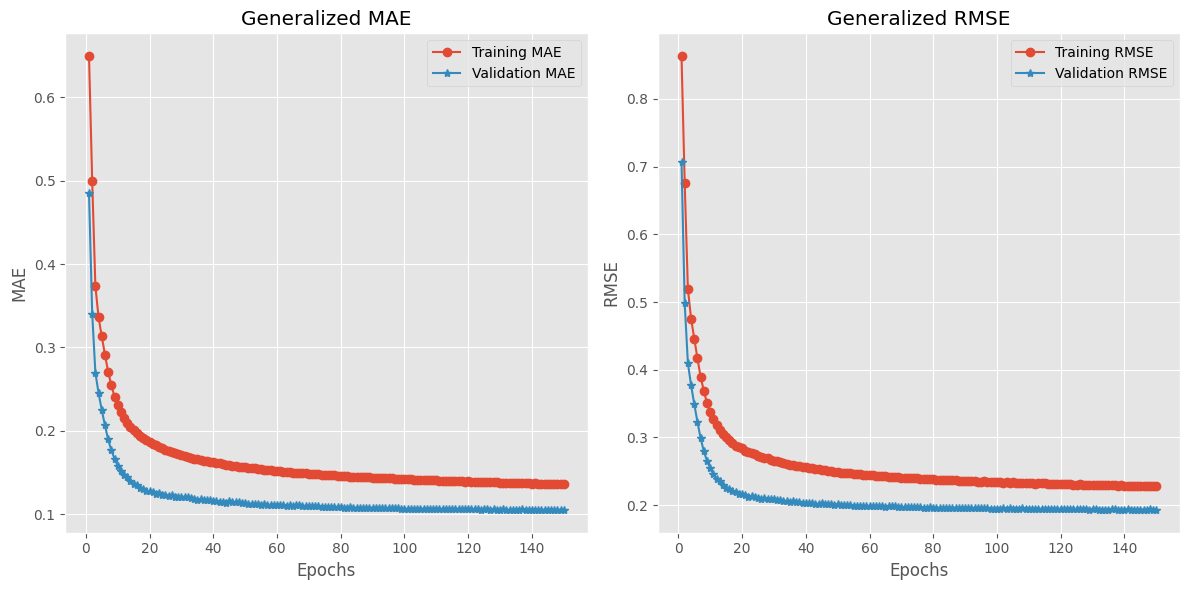

In [13]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break